**Importando bibliotecas necessárias**

In [106]:
import pandas as pd
import matplotlib.pyplot as plt


**Carregar csvs**

In [107]:
# Mostrar todas as colunas
pd.set_option('display.max_columns', None)  # Mostrar todas as colunas

comercializacao = pd.read_csv('Comercializacao.csv', sep = ';')

exportacao = pd.read_csv('Exportacao.csv', sep = ';')

importacao = pd.read_csv('Importacao.csv', sep = ';')

processamento = pd.read_csv('Processamento.csv', sep = ';')

# Visualizar primeiras linhas do dataset 'comercializacao'
comercializacao.head()


,id,control,Produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,122825298,128894580,166861772,195616620,171619507,185191837,203130018,131065191,150678647,172921267,164725646,190134895,180230431,201168480,180295366,146583828,165831436,174768638,181576649,200578746,221023603,221518224,227447392,217082959,225021830,271248493,245625614,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,99646124,99151812,131957890,151852639,129249097,138710394,153357217,96590206,114100716,136642954,120889721,141726264,138190489,157031022,140192480,108968350,122549540,127693158,133479291,150857434,172183792,176793696,181274195,179225328,186236086,227987458,209438207,190526781,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,14746625,16360547,15786964,23841328,21724540,23988088,28544630,21376304,17329181,14564451,16482188,16322381,12822511,13767249,13762956,11653971,13374874,13550872,12980172,13221934,9150927,7283912,8434812,6945806,5478618,3562059,3071382,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,8432549,13382221,19116918,19922653,20645870,22493355,21228171,13098681,19248750,21713862,27353737,32086250,29217431,30370209,26339930,25961507,29907022,33524608,35117186,36499378,39688884,37440616,37738385,30911825,33307126,39698976,33116025,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,22976342,21607857,26302928,32690119,42164393,44599207,50881779,34335860,40014386,50390262,39885259,37526111,39537060,49916112,46541918,40195501,43695771,46442209,32456318,37096571,34195829,28701658,25438750,23293171,19884366,22306004,22767358,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [108]:
print(comercializacao.shape)
print(importacao.shape)
print(exportacao.shape)
print(processamento.shape)


(62, 57)
(68, 110)
(137, 110)
(139, 57)


In [109]:
# Comparando esses valores com os do site, parece que colunas dos anos não são tipo 'float', mas sim 'int'
#(https://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_04)
comercializacao[['Produto', '2023']].head()

,Produto,2023
0,VINHO DE MESA,187016848
1,Tinto,165097539
2,Rosado,2520748
3,Branco,19398561
4,VINHO FINO DE MESA,18589310


**Padronizar colunas e registros**

In [110]:
# Padronizar nomes na coluna Produto
comercializacao['Produto'] = (
    comercializacao['Produto']
    .str.strip()  # remove espaços no início e fim
    .str.replace(r'\s+', ' ', regex=True)  # substitui múltiplos espaços por um só
    .str.upper()  # coloca tudo em maiúsculas
)
comercializacao.head()

,id,control,Produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,122825298,128894580,166861772,195616620,171619507,185191837,203130018,131065191,150678647,172921267,164725646,190134895,180230431,201168480,180295366,146583828,165831436,174768638,181576649,200578746,221023603,221518224,227447392,217082959,225021830,271248493,245625614,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,2,vm_Tinto,TINTO,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,99646124,99151812,131957890,151852639,129249097,138710394,153357217,96590206,114100716,136642954,120889721,141726264,138190489,157031022,140192480,108968350,122549540,127693158,133479291,150857434,172183792,176793696,181274195,179225328,186236086,227987458,209438207,190526781,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,3,vm_Rosado,ROSADO,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,14746625,16360547,15786964,23841328,21724540,23988088,28544630,21376304,17329181,14564451,16482188,16322381,12822511,13767249,13762956,11653971,13374874,13550872,12980172,13221934,9150927,7283912,8434812,6945806,5478618,3562059,3071382,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,4,vm_Branco,BRANCO,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,8432549,13382221,19116918,19922653,20645870,22493355,21228171,13098681,19248750,21713862,27353737,32086250,29217431,30370209,26339930,25961507,29907022,33524608,35117186,36499378,39688884,37440616,37738385,30911825,33307126,39698976,33116025,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,22976342,21607857,26302928,32690119,42164393,44599207,50881779,34335860,40014386,50390262,39885259,37526111,39537060,49916112,46541918,40195501,43695771,46442209,32456318,37096571,34195829,28701658,25438750,23293171,19884366,22306004,22767358,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [111]:
# Alterar o formato da tabela para long, adicionando Ano como coluna

from matplotlib.ticker import FuncFormatter

comercializacao_long = comercializacao.melt(
    id_vars=['id', 'control', 'Produto'],
    var_name='Ano',
    value_name='Comercializacao'
)

# Somente dados dos últimos 15 anos
comercializacao_long= comercializacao_long[comercializacao_long['Ano'] >= '2009']

comercializacao_long.head()

,id,control,Produto,Ano,Comercializacao
2418,1,VINHO DE MESA,VINHO DE MESA,2009,234525979
2419,2,vm_Tinto,TINTO,2009,193004182
2420,3,vm_Rosado,ROSADO,2009,2307580
2421,4,vm_Branco,BRANCO,2009,39214217
2422,5,VINHO FINO DE MESA,VINHO FINO DE MESA,2009,33080270


In [112]:
print(comercializacao_long.isna().sum())


id                  0
control            15
Produto             0
Ano                 0
Comercializacao     0
dtype: int64


In [113]:
#
comercializacao_long[comercializacao_long['control'].isna()].head()

,id,control,Produto,Ano,Comercializacao
2443,26,NaN,OUTROS PRODUTOS COMERCIALIZADOS,2009,26554757
2505,26,NaN,OUTROS PRODUTOS COMERCIALIZADOS,2010,29023870
2567,26,NaN,OUTROS PRODUTOS COMERCIALIZADOS,2011,28783827
2629,26,NaN,OUTROS PRODUTOS COMERCIALIZADOS,2012,30316511
2691,26,NaN,OUTROS PRODUTOS COMERCIALIZADOS,2013,36841561


In [114]:
print(comercializacao_long['control'].unique())
print(len(comercializacao_long['control'].unique()))

['VINHO DE MESA' 'vm_Tinto' 'vm_Rosado' 'vm_Branco' 'VINHO  FINO DE MESA'
 'VINHO FRIZANTE' 'VINHO ORGÂNICO' 'VINHO ESPECIAL' 've_Tinto' 've_Rosado'
 've_Branco' 'ESPUMANTES ' 'es_Espumante_Moscatel' 'es_Espumante'
 'es_Espumante Orgânico' 'SUCO DE UVAS' 'su_Suco_Natural'
 'su_Suco_Adoçado' 'su_Suco_Reprocessado' 'su_Suco_Orgânico'
 'su_Outros_sucos' 'SUCO DE UVAS CONCENTRADO' nan
 'ou_Outros vinhos (sem informdetalhada' 'ou_Agrin' 'ou_Aguardente'
 'ou_Alcool_vinico' 'ou_Bagaceira' 'ou_Base_champenoise' 'ou_Base_charmat'
 'ou_Base_espumante' 'ou_Bebida' 'ou_Borra_liqwuida' 'ou_Borra_seca'
 'ou_Brandy' 'ou_Cooler' 'ou_Coquetel' 'ou_Destilado' 'ou_Filtrado_doce'
 'ou_Jeropiga' 'ou_Mistelas' 'ou_Mosto_concentrado' 'ou_Mosto_uva'
 'ou_Mosto_sulfitado' 'ou_Nectar' 'ou_Outros_produtos' 'ou_Polpa'
 'ou_Preparado_líquido' 'ou_Refrigerante' 'ou_Sangria'
 'ou_Vinagre_balsamico' 'ou_Vinagre_duplo' 'ou_Vinagre_simples'
 'ou_Vinho_acetificado' 'ou_Vinho_base' 'ou_Vinho_composto'
 'ou_Vinho_licoroso

In [115]:
# Verificando se sempre que 'control' é NaN, 'Produto' = 'OUTROS PRODUTOS COMERCIALIZADOS'
condicao = (comercializacao_long['control'].isna() == (comercializacao_long['Produto'] == 'OUTROS PRODUTOS COMERCIALIZADOS'))
print(condicao.all()) # True
# Já que condição é verdadeira, atribuir valor ''OUTROS' aos registros NaN na coluna 'control', assim não preciso remover registros NaN
comercializacao_long.fillna({'control': 'OUTROS'}, inplace = True)
comercializacao_long[comercializacao_long['control'] == 'outros'].head()


True


,id,control,Produto,Ano,Comercializacao


In [116]:
# Fazer dicionario para classificar produtos por tipo
mapa_categoria = {
    # Suco
    'SUCO DE UVAS': 'Suco',
    'su_Suco_Natural': 'Suco',
    'su_Suco_Adoçado': 'Suco',
    'su_Suco_Reprocessado': 'Suco',
    'su_Suco_Orgânico': 'Suco',
    'su_Outros_sucos': 'Suco',
    'SUCO DE UVAS CONCENTRADO': 'Suco',

    # Vinho de mesa
    'VINHO DE MESA': 'Vinho de Mesa',
    'vm_Tinto': 'Vinho de Mesa',
    'vm_Rosado': 'Vinho de Mesa',
    'vm_Branco': 'Vinho de Mesa',

    # Vinho fino
    'VINHO FINO DE MESA': 'Vinho Fino',
    've_Tinto': 'Vinho Fino',
    've_Rosado': 'Vinho Fino',
    've_Branco': 'Vinho Fino',

    # Vinho especial
    'VINHO FRIZANTE': 'Vinho Especial',
    'VINHO ORGÂNICO': 'Vinho Especial',
    'VINHO ESPECIAL': 'Vinho Especial',

    # Espumantes
    'ESPUMANTES': 'Espumante',
    'es_Espumante': 'Espumante',
    'es_Espumante_Moscatel': 'Espumante',
    'es_Espumante Orgânico': 'Espumante',

    # Outros
    'outros': 'Outros',
    # Todos os que começam com 'ou_' vão entrar como 'Outros'
}

# Adicionar ao dataframe
comercializacao_long['Categoria'] = comercializacao_long['control'].apply(
    lambda x: mapa_categoria.get(x, 'Outros') if not x.startswith('ou_') else 'Outros'
)
comercializacao_long.head()

,id,control,Produto,Ano,Comercializacao,Categoria
2418,1,VINHO DE MESA,VINHO DE MESA,2009,234525979,Vinho de Mesa
2419,2,vm_Tinto,TINTO,2009,193004182,Vinho de Mesa
2420,3,vm_Rosado,ROSADO,2009,2307580,Vinho de Mesa
2421,4,vm_Branco,BRANCO,2009,39214217,Vinho de Mesa
2422,5,VINHO FINO DE MESA,VINHO FINO DE MESA,2009,33080270,Outros


In [117]:
comercializacao_long['control'].unique()

array(['VINHO DE MESA', 'vm_Tinto', 'vm_Rosado', 'vm_Branco',
       'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
       'VINHO ESPECIAL', 've_Tinto', 've_Rosado', 've_Branco',
       'ESPUMANTES ', 'es_Espumante_Moscatel', 'es_Espumante',
       'es_Espumante Orgânico', 'SUCO DE UVAS', 'su_Suco_Natural',
       'su_Suco_Adoçado', 'su_Suco_Reprocessado', 'su_Suco_Orgânico',
       'su_Outros_sucos', 'SUCO DE UVAS CONCENTRADO', 'OUTROS',
       'ou_Outros vinhos (sem informdetalhada', 'ou_Agrin',
       'ou_Aguardente', 'ou_Alcool_vinico', 'ou_Bagaceira',
       'ou_Base_champenoise', 'ou_Base_charmat', 'ou_Base_espumante',
       'ou_Bebida', 'ou_Borra_liqwuida', 'ou_Borra_seca', 'ou_Brandy',
       'ou_Cooler', 'ou_Coquetel', 'ou_Destilado', 'ou_Filtrado_doce',
       'ou_Jeropiga', 'ou_Mistelas', 'ou_Mosto_concentrado',
       'ou_Mosto_uva', 'ou_Mosto_sulfitado', 'ou_Nectar',
       'ou_Outros_produtos', 'ou_Polpa', 'ou_Preparado_líquido',
       'ou_Refrigerante', 'ou

In [118]:
# # Remover registros que se referem aos valores totais:
# 'VINHO DE MESA', 'VINHO  FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
# 'VINHO ESPECIAL', 'ESPUMANTES ', 'SUCO DE UVAS CONCENTRADO', 'SUCO DE UVAS', 'OUTROS'


**Gráficos Exploratórios dados da tabela 'comercializacao'**

In [119]:

# Remover os registros que sao o valor total para aquela categoria
top10_produtos = comercializacao_long[
    ~comercializacao_long['control'].isin([
        'VINHO DE MESA', 'VINHO FINO DE MESA', 'VINHO FRIZANTE', 'VINHO ORGÂNICO',
        'VINHO ESPECIAL', 'ESPUMANTES', 'SUCO DE UVAS CONCENTRADO', 'SUCO DE UVAS', 'OUTROS'
    ])
]
# TOp 10 Total de litros comercializados por Produto
top10_produtos = (
    top10_produtos
    .groupby('Produto')['Comercializacao']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)
# Filtrar apenas os Top 10
top10_long = comercializacao_long[comercializacao_long['Produto'].isin(top10_produtos)]
print(top10_long['Produto'].unique())

['TINTO' 'BRANCO' 'VINHO FINO DE MESA' 'ESPUMANTES' 'ESPUMANTE MOSCATEL'
 'ESPUMANTE' 'SUCO NATURAL INTEGRAL' 'SUCO REPROCESSADO/RECONSTITUIDO'
 'FILTRADO DOCE' 'VINAGRE SIMPLES']


In [120]:
# Função para formatar os valores do eixo Y
def formatar_valores(valor, _):
    if valor >= 1_000_000:
        return f'{valor/1_000_000:.1f} mi'
    elif valor >= 1_000:
        return f'{valor/1_000:.0f} mil'
    else:
        return f'{valor:.0f}'

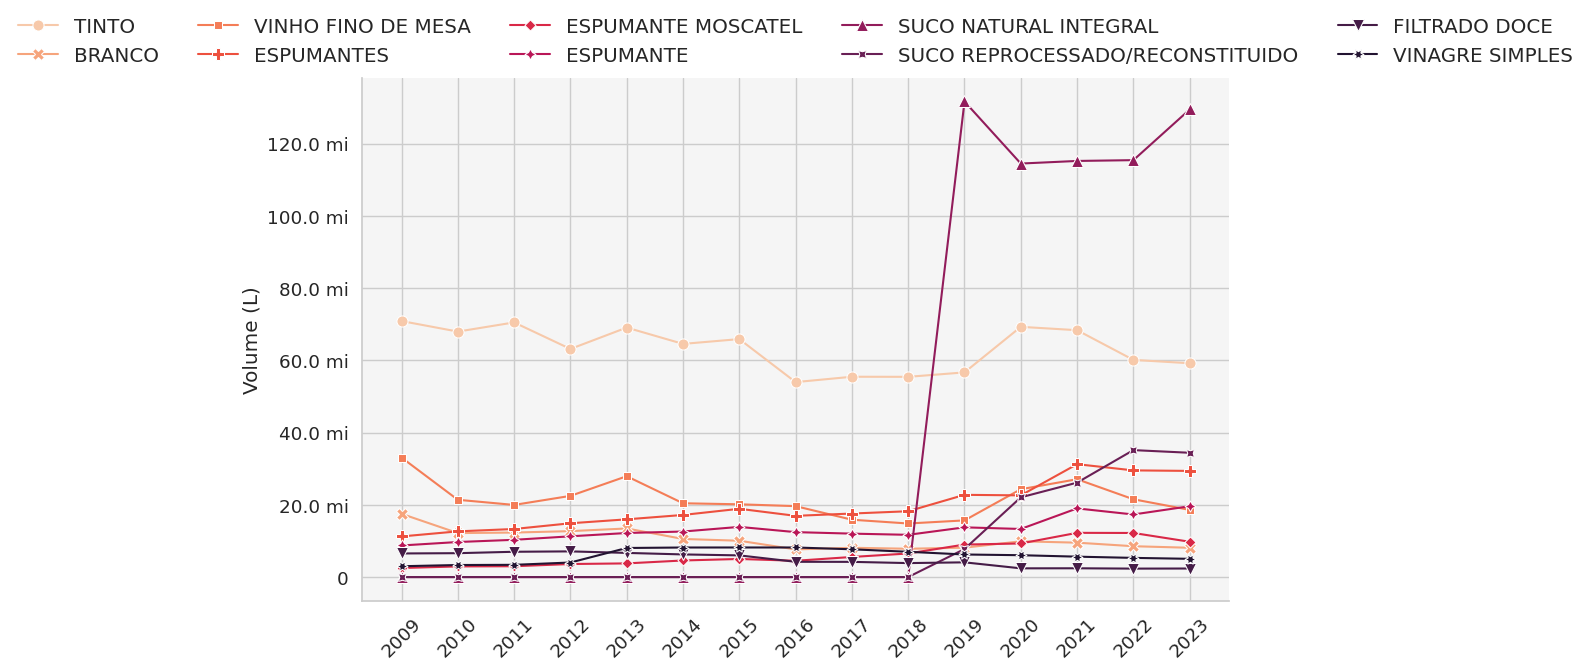

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 🔹 Filtrar últimos 15 anos
top10_long_2009 = top10_long[top10_long['Ano'] >= '2009']

# 🔹 Criar o gráfico
plt.figure(figsize=(14, 7))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.3)

# 🔹 Gráfico com marcador por cor
sns.lineplot(
    data=top10_long_2009,
    x='Ano',
    y='Comercializacao',
    hue='Produto',
    style='Produto',         # Cada produto com estilo de linha e marcador
    markers=True,            # Ativa os marcadores
    markersize = 8,
    dashes=False,            # Mantém linhas contínuas
    errorbar=None,
    palette='rocket_r'
)

plt.xticks(rotation=45)
plt.title('')
plt.xlabel('')
plt.ylabel('Volume (L)')
plt.legend(
    title='',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    frameon=False
)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

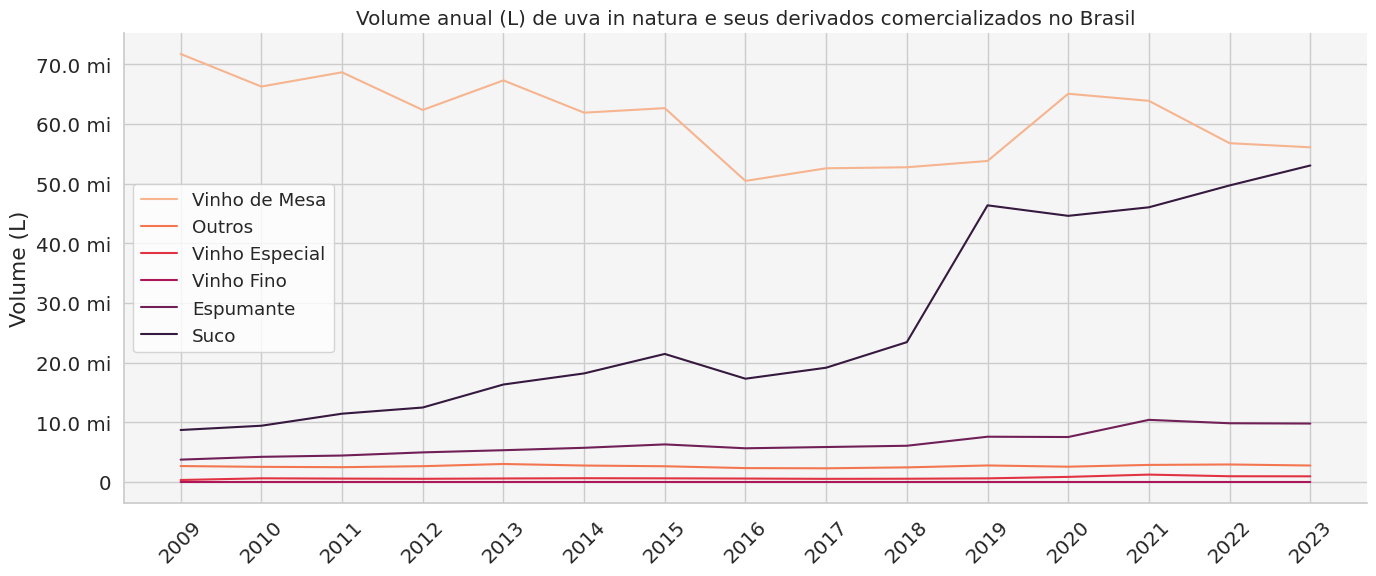

In [122]:
# Criar o gráfico
plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=comercializacao_long, x='Ano', y='Comercializacao', hue = 'Categoria', errorbar = None
             , palette = 'rocket_r')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Volume anual (L) de uva in natura e seus derivados comercializados no Brasil')
plt.ylabel('Volume (L)')
plt.xlabel('')
plt.legend(
    title='',
#     loc='center',
#     bbox_to_anchor=(0.5, 1.15),
#     ncol=5,
#     frameon=False
 )
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Exportação

In [123]:

# Visualizar primeiras linhas do dataset 'exportacao'

# Padronizar registros contidos na coluna País do df exportacao
exportacao['País'] = (
    exportacao['País']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.upper()
)

exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,AFEGANISTÃO,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,46,0,0,0,0
1,2,ÁFRICA DO SUL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,463,1673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,95,4,21,0,0,0,0,117,698
2,3,"ALEMANHA, REPÚBLICA DEMOCRÁTICA",0,0,0,0,4168,2630,12000,8250,0,0,0,0,0,0,0,0,0,0,5400,6500,0,0,0,0,0,0,0,0,0,0,67,136,1037,1750,2700,4044,2205,3921,197,510,0,0,3780,7182,2700,5143,0,0,0,0,20700,40590,0,0,43,307,504,700,0,0,9900,15620,1673,11157,1080,4626,0,0,13589,28140,57393,106702,38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,ANGOLA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3465756,2387643,1682244,1118023,0,0,0,0,0,0,0,0,339,1082,774,1718,1316,3847,18500,12950,168,134,930,1090,125,116,292,332,189,238,0,0,24,46,2118,6401,68494,146017,15780,34732,10998,16738,249717,368817,12150,15529,9812,5290,19937,11437,37573,50382,24056,33039,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,1908,17089,7359,35390,10170,61680,477,709,345,1065,0,0,0,0,4068,4761,0,0
4,5,ANGUILLA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,80,324,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
exportacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Columns: 110 entries, Id to 2023.1
dtypes: int64(109), object(1)
memory usage: 117.9+ KB


In [125]:
exportacao['País'].unique()

array(['AFEGANISTÃO', 'ÁFRICA DO SUL', 'ALEMANHA, REPÚBLICA DEMOCRÁTICA',
       'ANGOLA', 'ANGUILLA', 'ANTÍGUA E BARBUDA', 'ANTILHAS HOLANDESAS',
       'ARÁBIA SAUDITA', 'ARGENTINA', 'ARUBA', 'AUSTRÁLIA', 'ÁUSTRIA',
       'BAHAMAS', 'BANGLADESH', 'BARBADOS', 'BAREIN', 'BÉLGICA', 'BELICE',
       'BENIN', 'BERMUDAS', 'BOLÍVIA', 'BÓSNIA-HERZEGOVINA', 'BRASIL',
       'BULGÁRIA', 'CABO VERDE', 'CAMARÕES', 'CANADÁ', 'CATAR',
       'CAYMAN, ILHAS', 'CHILE', 'CHINA', 'CHIPRE', 'CINGAPURA',
       'COCOS (KEELING), ILHAS', 'COLÔMBIA', 'COMORES', 'CONGO',
       'COREIA, REPUBLICA SUL', 'COSTA DO MARFIM', 'COSTA RICA',
       'CROÁCIA', 'CUBA', 'CURAÇAO', 'DINAMARCA', 'DOMINICA',
       'EL SALVADOR', 'EMIRADOS ARABES UNIDOS', 'EQUADOR',
       'ESLOVACA, REPUBLICA', 'ESPANHA', 'ESTADOS UNIDOS', 'ESTÔNIA',
       'FILIPINAS', 'FINLÂNDIA', 'FRANÇA', 'GANA', 'GIBRALTAR', 'GRANADA',
       'GRÉCIA', 'GUATEMALA', 'GUIANA', 'GUIANA FRANCESA', 'GUINE BISSAU',
       'GUINE EQUATORIAL', 'HAITI', 

In [126]:
padroniza_paises = {
    'AFEGANISTÃO': 'Afeganistão',
    'ÁFRICA DO SUL': 'África do Sul',
    'ALEMANHA, REPÚBLICA DEMOCRÁTICA': 'Alemanha Oriental',
    'ANGOLA': 'Angola',
    'ANGUILLA': 'Anguilla',
    'ANTÍGUA E BARBUDA': 'Antígua e Barbuda',
    'ANTILHAS HOLANDESAS': 'Antilhas Holandesas',
    'ARÁBIA SAUDITA': 'Arábia Saudita',
    'ARGENTINA': 'Argentina',
    'ARUBA': 'Aruba',
    'AUSTRÁLIA': 'Austrália',
    'ÁUSTRIA': 'Áustria',
    'BAHAMAS': 'Bahamas',
    'BANGLADESH': 'Bangladesh',
    'BARBADOS': 'Barbados',
    'BAREIN': 'Bahrein',
    'BÉLGICA': 'Bélgica',
    'BELICE': 'Belize',
    'BENIN': 'Benin',
    'BERMUDAS': 'Bermudas',
    'BOLÍVIA': 'Bolívia',
    'BÓSNIA-HERZEGOVINA': 'Bósnia-Herzegovina',
    'BRASIL': 'Brasil',
    'BULGÁRIA': 'Bulgária',
    'CABO VERDE': 'Cabo Verde',
    'CAMARÕES': 'Camarões',
    'CANADÁ': 'Canadá',
    'CATAR': 'Catar',
    'CAYMAN, ILHAS': 'Ilhas Cayman',
    'CHILE': 'Chile',
    'CHINA': 'China',
    'CHIPRE': 'Chipre',
    'CINGAPURA': 'Singapura',
    'COCOS (KEELING), ILHAS': 'Ilhas Cocos (Keeling)',
    'COLÔMBIA': 'Colômbia',
    'COMORES': 'Comores',
    'CONGO': 'Congo',
    'COREIA, REPUBLICA SUL': 'Coreia do Sul',
    'COSTA DO MARFIM': 'Costa do Marfim',
    'COSTA RICA': 'Costa Rica',
    'CROÁCIA': 'Croácia',
    'CUBA': 'Cuba',
    'CURAÇAO': 'Curaçao',
    'DINAMARCA': 'Dinamarca',
    'DOMINICA': 'Dominica',
    'EL SALVADOR': 'El Salvador',
    'EMIRADOS ARABES UNIDOS': 'Emirados Árabes Unidos',
    'EQUADOR': 'Equador',
    'ESLOVACA, REPUBLICA': 'Eslováquia',
    'ESPANHA': 'Espanha',
    'ESTADOS UNIDOS': 'Estados Unidos',
    'ESTÔNIA': 'Estônia',
    'FILIPINAS': 'Filipinas',
    'FINLÂNDIA': 'Finlândia',
    'FRANÇA': 'França',
    'GANA': 'Gana',
    'GIBRALTAR': 'Gibraltar',
    'GRANADA': 'Granada',
    'GRÉCIA': 'Grécia',
    'GUATEMALA': 'Guatemala',
    'GUIANA': 'Guiana',
    'GUIANA FRANCESA': 'Guiana Francesa',
    'GUINE BISSAU': 'Guiné-Bissau',
    'GUINE EQUATORIAL': 'Guiné Equatorial',
    'HAITI': 'Haiti',
    'HONDURAS': 'Honduras',
    'HONG KONG': 'Hong Kong',
    'HUNGRIA': 'Hungria',
    'ILHA DE MAN': 'Ilha de Man',
    'ILHAS VIRGENS': 'Ilhas Virgens',
    'INDIA': 'Índia',
    'INDONÉSIA': 'Indonésia',
    'IRÃ': 'Irã',
    'IRAQUE': 'Iraque',
    'IRLANDA': 'Irlanda',
    'ITÁLIA': 'Itália',
    'JAMAICA': 'Jamaica',
    'JAPÃO': 'Japão',
    'JORDÂNIA': 'Jordânia',
    'LETÔNIA': 'Letônia',
    'LÍBANO': 'Líbano',
    'LIBÉRIA': 'Libéria',
    'LUXEMBURGO': 'Luxemburgo',
    'MACAU': 'Macau',
    'MALÁSIA': 'Malásia',
    'MALAVI': 'Malawi',
    'MALTA': 'Malta',
    'MARSHALL, ILHAS': 'Ilhas Marshall',
    'MARTINICA': 'Martinica',
    'MAURITÂNIA': 'Mauritânia',
    'MÉXICO': 'México',
    'MOÇAMBIQUE': 'Moçambique',
    'MONTENEGRO': 'Montenegro',
    'NAMÍBIA': 'Namíbia',
    'NICARÁGUA': 'Nicarágua',
    'NIGÉRIA': 'Nigéria',
    'NORUEGA': 'Noruega',
    'NOVA CALEDÔNIA': 'Nova Caledônia',
    'NOVA ZELÂNDIA': 'Nova Zelândia',
    'OMÃ': 'Omã',
    'PAÍSES BAIXOS': 'Países Baixos',
    'PALAU': 'Palau',
    'PANAMÁ': 'Panamá',
    'PARAGUAI': 'Paraguai',
    'PERU': 'Peru',
    'PITCAIRN': 'Ilhas Pitcairn',
    'POLÔNIA': 'Polônia',
    'PORTO RICO': 'Porto Rico',
    'PORTUGAL': 'Portugal',
    'QUÊNIA': 'Quênia',
    'REINO UNIDO': 'Reino Unido',
    'REPÚBLICA DOMINICANA': 'República Dominicana',
    'RÚSSIA': 'Rússia',
    'SÃO CRISTÓVÃO E NÉVIS': 'São Cristóvão e Névis',
    'SÃO TOMÉ E PRÍNCIPE': 'São Tomé e Príncipe',
    'SÃO VICENTE E GRANADINAS': 'São Vicente e Granadinas',
    'SENEGAL': 'Senegal',
    'SERRA LEOA': 'Serra Leoa',
    'SUAZILÂNDIA': 'Suazilândia',
    'SUÉCIA': 'Suécia',
    'SUÍÇA': 'Suíça',
    'SURINAME': 'Suriname',
    'TAILÂNDIA': 'Tailândia',
    'TAIWAN (FORMOSA)': 'Taiwan',
    'TANZÂNIA': 'Tanzânia',
    'TCHECA, REPÚBLICA': 'República Tcheca',
    'TOGO': 'Togo',
    'TOQUELAU': 'Toquelau',
    'TRINIDADE TOBAGO': 'Trinidad e Tobago',
    'TUNÍSIA': 'Tunísia',
    'TURQUIA': 'Turquia',
    'TUVALU': 'Tuvalu',
    'URUGUAI': 'Uruguai',
    'VANUATU': 'Vanuatu',
    'VENEZUELA': 'Venezuela',
    'VIETNÃ': 'Vietnã'
}

exportacao['País'] = exportacao['País'].map( padroniza_paises)
exportacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,463,1673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,95,4,21,0,0,0,0,117,698
2,3,Alemanha Oriental,0,0,0,0,4168,2630,12000,8250,0,0,0,0,0,0,0,0,0,0,5400,6500,0,0,0,0,0,0,0,0,0,0,67,136,1037,1750,2700,4044,2205,3921,197,510,0,0,3780,7182,2700,5143,0,0,0,0,20700,40590,0,0,43,307,504,700,0,0,9900,15620,1673,11157,1080,4626,0,0,13589,28140,57393,106702,38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3465756,2387643,1682244,1118023,0,0,0,0,0,0,0,0,339,1082,774,1718,1316,3847,18500,12950,168,134,930,1090,125,116,292,332,189,238,0,0,24,46,2118,6401,68494,146017,15780,34732,10998,16738,249717,368817,12150,15529,9812,5290,19937,11437,37573,50382,24056,33039,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,1908,17089,7359,35390,10170,61680,477,709,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,80,324,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
# Remover Brasil do dataset de exportacao? Por enquanto não, isso pode indicar 'reimportação' ou exportação para zonas internas especiais
#exportacao = exportacao[exportacao['País'] != 'BRASIL']

In [128]:

# Padronizar nomes das colunas

import re  # Importa o módulo de expressões regulares

# Seleciona colunas que representam apenas o ano (ex: '1970', '1985', '2023')
colunas_volume = [
    col for col in exportacao.columns
    if re.match(r'^\d{4}$', str(col))  # Regex: começa e termina com exatamente 4 dígitos
]

# Seleciona colunas que representam o valor monetário (ex: '1970.1', '1985.1', '2023.1')
colunas_valor = [
    col for col in exportacao.columns
    if re.match(r'^\d{4}\.1$', str(col))  # Regex: 4 dígitos seguidos de ponto e 1
]

# Transformar df para formato long (tidy)
exportacao_volume_long = exportacao.melt(
    id_vars=['Id', 'País'],
    value_vars=colunas_volume,
    var_name='Ano',
    value_name='Volume'
)

exportacao_valor_long = exportacao.melt(
    id_vars=['Id', 'País'],
    value_vars=colunas_valor,
    var_name='Ano',
    value_name='Valor'
)

# Ajustar o nome do ano (remover ".1")
exportacao_valor_long['Ano'] = exportacao_valor_long['Ano'].str.replace('.1', '', regex=False)

# Unir longs
exportacao_long = pd.merge(
    exportacao_volume_long,
    exportacao_valor_long,
    on=['Id', 'País', 'Ano'],
    how='outer'
)

# Somente dados dos últimos 15 anos
exportacao_long = exportacao_long[exportacao_long['Ano'] >= '2009']


print(exportacao_long.head())





    Id         País   Ano  Volume  Valor
39   1  Afeganistão  2009       0      0
40   1  Afeganistão  2010       0      0
41   1  Afeganistão  2011       0      0
42   1  Afeganistão  2012       0      0
43   1  Afeganistão  2013       0      0


In [129]:
# Não há registros nulos
exportacao_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 39 to 7397
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      2055 non-null   int64 
 1   País    2040 non-null   object
 2   Ano     2055 non-null   object
 3   Volume  2055 non-null   int64 
 4   Valor   2055 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 96.3+ KB


In [130]:
exportacao_long['Valor'].unique()

array([       0,       46,       95,       21,      698,   393482,
         138666,   144150,    56342,   265978,   761653,    44780,
          68109,    87702,    45382,    25467,    32605,     6741,
          45367,    31853,    84235,   189891,    69001,     8861,
           9300,    23124,    17089,    35390,    61680,      709,
           1065,     4761,      191,     1549,     1864,     2268,
           1866,     1848,    10651,    12808,    10188,    14081,
          19565,     7169,    10545,    26450,     8550,      142,
           4523,    55460,    95130,    59150,     4176,       13,
           3232,    36133,     1680,      755,     9195,    17960,
          40704,    56045,   101715,    43709,    48011,    13799,
           7500,     6902,     4682,     3413,     4034,    12299,
          13565,     5220,      212,    12759,    28810,    12087,
           5145,      634,     3124,     3703,     4567,     5799,
           7402,       29,       20,       84,      394,      

In [131]:
# Sem registros duplicados
exportacao_long.duplicated().sum()

np.int64(0)

In [132]:
# Trocar nome "Alemanha Oriental" por Alemanha

exportacao_long.loc[exportacao_long['País'] == 'Alemanha Oriental', 'País'] = 'Alemanha'

In [133]:
exportacao_long['País'].unique()

array(['Afeganistão', 'África do Sul', 'Alemanha', 'Angola', 'Anguilla',
       'Antígua e Barbuda', 'Antilhas Holandesas', 'Arábia Saudita',
       'Argentina', 'Aruba', 'Austrália', 'Áustria', 'Bahamas',
       'Bangladesh', 'Barbados', 'Bahrein', 'Bélgica', 'Belize', 'Benin',
       'Bermudas', 'Bolívia', 'Bósnia-Herzegovina', 'Brasil', 'Bulgária',
       'Cabo Verde', 'Camarões', 'Canadá', 'Catar', 'Ilhas Cayman',
       'Chile', 'China', 'Chipre', 'Singapura', 'Ilhas Cocos (Keeling)',
       'Colômbia', 'Comores', 'Congo', 'Coreia do Sul', 'Costa do Marfim',
       'Costa Rica', 'Croácia', 'Cuba', 'Curaçao', 'Dinamarca',
       'Dominica', 'El Salvador', 'Emirados Árabes Unidos', 'Equador',
       'Eslováquia', 'Espanha', 'Estados Unidos', 'Estônia', 'Filipinas',
       'Finlândia', 'França', 'Gana', 'Gibraltar', 'Granada', 'Grécia',
       'Guatemala', 'Guiana', 'Guiana Francesa', 'Guiné-Bissau',
       'Guiné Equatorial', 'Haiti', 'Honduras', 'Hong Kong', 'Hungria',
       'Ilha

In [134]:
# Fazer dicionario para classificar países por região do mundo

regiao_geografica = {
    # África
    'África do Sul': 'África',
    'Angola': 'África',
    'Benin': 'África',
    'Cabo Verde': 'África',
    'Camarões': 'África',
    'Comores': 'África',
    'Congo': 'África',
    'Costa do Marfim': 'África',
    'Gana': 'África',
    'Guiné-Bissau': 'África',
    'Guiné Equatorial': 'África',
    'Libéria': 'África',
    'Mauritânia': 'África',
    'Moçambique': 'África',
    'Namíbia': 'África',
    'Nigéria': 'África',
    'Quênia': 'África',
    'Senegal': 'África',
    'Serra Leoa': 'África',
    'Suazilândia': 'África',
    'São Tomé e Príncipe': 'África',
    'Tanzânia': 'África',
    'Togo': 'África',
    'Tunísia': 'África',

    # América Latina
    'Argentina': 'América Latina',
    'Bolívia': 'América Latina',
    'Brasil': 'América Latina',
    'Chile': 'América Latina',
    'Colômbia': 'América Latina',
    'Equador': 'América Latina',
    'Guiana': 'América Latina',
    'Guiana Francesa': 'América Latina',
    'Paraguai': 'América Latina',
    'Peru': 'América Latina',
    'Suriname': 'América Latina',
    'Uruguai': 'América Latina',
    'Venezuela': 'América Latina',

    # América Central e Caribe
    'Anguilla': 'América Central e Caribe',
    'Antígua e Barbuda': 'América Central e Caribe',
    'Antilhas Holandesas': 'América Central e Caribe',
    'Aruba': 'América Central e Caribe',
    'Bahamas': 'América Central e Caribe',
    'Barbados': 'América Central e Caribe',
    'Belize': 'América Central e Caribe',
    'Bermudas': 'América Central e Caribe',
    'Cayman, Ilhas': 'América Central e Caribe',
    'Costa Rica': 'América Central e Caribe',
    'Cuba': 'América Central e Caribe',
    'Curaçao': 'América Central e Caribe',
    'Dominica': 'América Central e Caribe',
    'El Salvador': 'América Central e Caribe',
    'Guatemala': 'América Central e Caribe',
    'Haiti': 'América Central e Caribe',
    'Honduras': 'América Central e Caribe',
    'Ilhas Virgens': 'América Central e Caribe',
    'Jamaica': 'América Central e Caribe',
    'Martinica': 'América Central e Caribe',
    'México': 'América Central e Caribe',
    'Nicarágua': 'América Central e Caribe',
    'Panamá': 'América Central e Caribe',
    'Porto Rico': 'América Central e Caribe',
    'República Dominicana': 'América Central e Caribe',
    'São Cristóvão e Névis': 'América Central e Caribe',
    'São Vicente e Granadinas': 'América Central e Caribe',
    'Trinidad e Tobago': 'América Central e Caribe',

    # EUA e Canadá
    'Canadá': 'EUA e Canadá',
    'Estados Unidos': 'EUA e Canadá',

    # Europa
    'Alemanha Oriental': 'Europa',
    'Áustria': 'Europa',
    'Bélgica': 'Europa',
    'Bósnia-Herzegovina': 'Europa',
    'Bulgária': 'Europa',
    'Croácia': 'Europa',
    'Dinamarca': 'Europa',
    'Eslováquia': 'Europa',
    'Espanha': 'Europa',
    'Estônia': 'Europa',
    'Finlândia': 'Europa',
    'França': 'Europa',
    'Grécia': 'Europa',
    'Hungria': 'Europa',
    'Ilha de Man': 'Europa',
    'Irlanda': 'Europa',
    'Itália': 'Europa',
    'Letônia': 'Europa',
    'Luxemburgo': 'Europa',
    'Malta': 'Europa',
    'Montenegro': 'Europa',
    'Noruega': 'Europa',
    'Países Baixos': 'Europa',
    'Polônia': 'Europa',
    'Portugal': 'Europa',
    'Reino Unido': 'Europa',
    'República Tcheca': 'Europa',
    'Rússia': 'Europa',
    'Suécia': 'Europa',
    'Suíça': 'Europa',

    # Ásia
    'Afeganistão': 'Ásia',
    'Arábia Saudita': 'Ásia',
    'Bangladesh': 'Ásia',
    'Bahrein': 'Ásia',
    'Catar': 'Ásia',
    'China': 'Ásia',
    'Chipre': 'Ásia',
    'Cingapura': 'Ásia',
    'Coreia do Sul': 'Ásia',
    'Emirados Árabes Unidos': 'Ásia',
    'Filipinas': 'Ásia',
    'Hong Kong': 'Ásia',
    'Índia': 'Ásia',
    'Indonésia': 'Ásia',
    'Irã': 'Ásia',
    'Iraque': 'Ásia',
    'Israel': 'Ásia',
    'Japão': 'Ásia',
    'Jordânia': 'Ásia',
    'Líbano': 'Ásia',
    'Macau': 'Ásia',
    'Malásia': 'Ásia',
    'Omã': 'Ásia',
    'Taiwan': 'Ásia',
    'Tailândia': 'Ásia',
    'Turquia': 'Ásia',
    'Vietnã': 'Ásia',

    # Oceania
    'Austrália': 'Oceania',
    'Ilhas Cocos (Keeling)': 'Oceania',
    'Ilhas Marshall': 'Oceania',
    'Ilhas Pitcairn': 'Oceania',
    'Nova Caledônia': 'Oceania',
    'Nova Zelândia': 'Oceania',
    'Palau': 'Oceania',
    'Toquelau': 'Oceania',
    'Tuvalu': 'Oceania',
    'Vanuatu': 'Oceania'
}

# Adicionar a coluna regiao_geografica ao df exportacao

exportacao_long['regiao_geografica'] = exportacao_long['País'].map(regiao_geografica)
exportacao_long.head()



,Id,País,Ano,Volume,Valor,regiao_geografica
39,1,Afeganistão,2009,0,0,Ásia
40,1,Afeganistão,2010,0,0,Ásia
41,1,Afeganistão,2011,0,0,Ásia
42,1,Afeganistão,2012,0,0,Ásia
43,1,Afeganistão,2013,0,0,Ásia


In [135]:
# Métrica valor/volume por país

exportacao_long['Valor/Volume'] = exportacao_long['Valor'] / exportacao_long['Volume']
exportacao_long.head()

,Id,País,Ano,Volume,Valor,regiao_geografica,Valor/Volume
39,1,Afeganistão,2009,0,0,Ásia,NaN
40,1,Afeganistão,2010,0,0,Ásia,NaN
41,1,Afeganistão,2011,0,0,Ásia,NaN
42,1,Afeganistão,2012,0,0,Ásia,NaN
43,1,Afeganistão,2013,0,0,Ásia,NaN


In [136]:
# Calcular top 10 países volume total
top10_paises_exp_vol = (
    exportacao_long
    .groupby('País')['Volume']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_paises_exp_vol = exportacao_long[exportacao_long['País'].isin(top10_paises_exp_vol)]

# Calcular top 10 países valor total
top10_paises_exp_valor = (
    exportacao_long
    .groupby('País')['Valor']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Listar os top 10 países em valor de exportação
top10_paises_exp_valor = exportacao_long[exportacao_long['País'].isin(top10_paises_exp_valor)]
top10_paises_exp_valor['País'].unique()

array(['Alemanha', 'China', 'Espanha', 'Estados Unidos', 'Haiti', 'Japão',
       'Países Baixos', 'Paraguai', 'Reino Unido', 'Rússia'], dtype=object)

/tmp/ipython-input-1243179372.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = '')


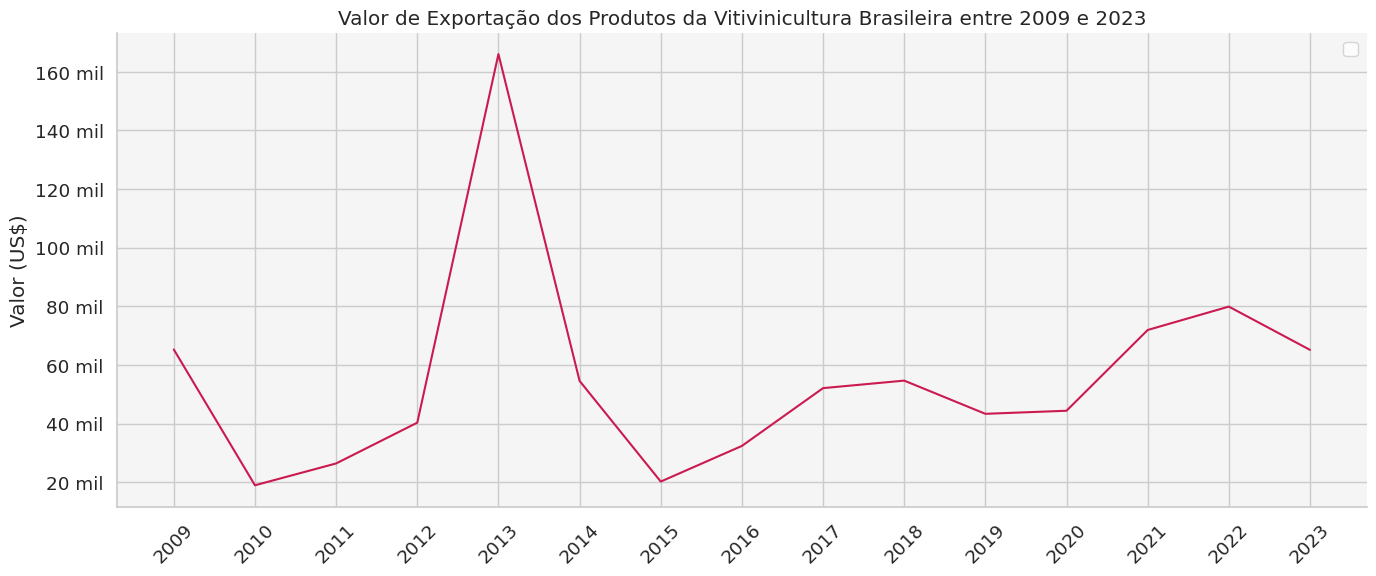

In [137]:
# Gráfico exportação por região geográfica
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


cor_rocket = sns.color_palette("rocket_r", 1)[0]

plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=exportacao_long, x='Ano', y='Valor', errorbar=None, color= cor_rocket )
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Valor de Exportação dos Produtos da Vitivinicultura Brasileira entre 2009 e 2023')
plt.ylabel('Valor (US$)')
plt.xlabel('')
plt.legend(title = '')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

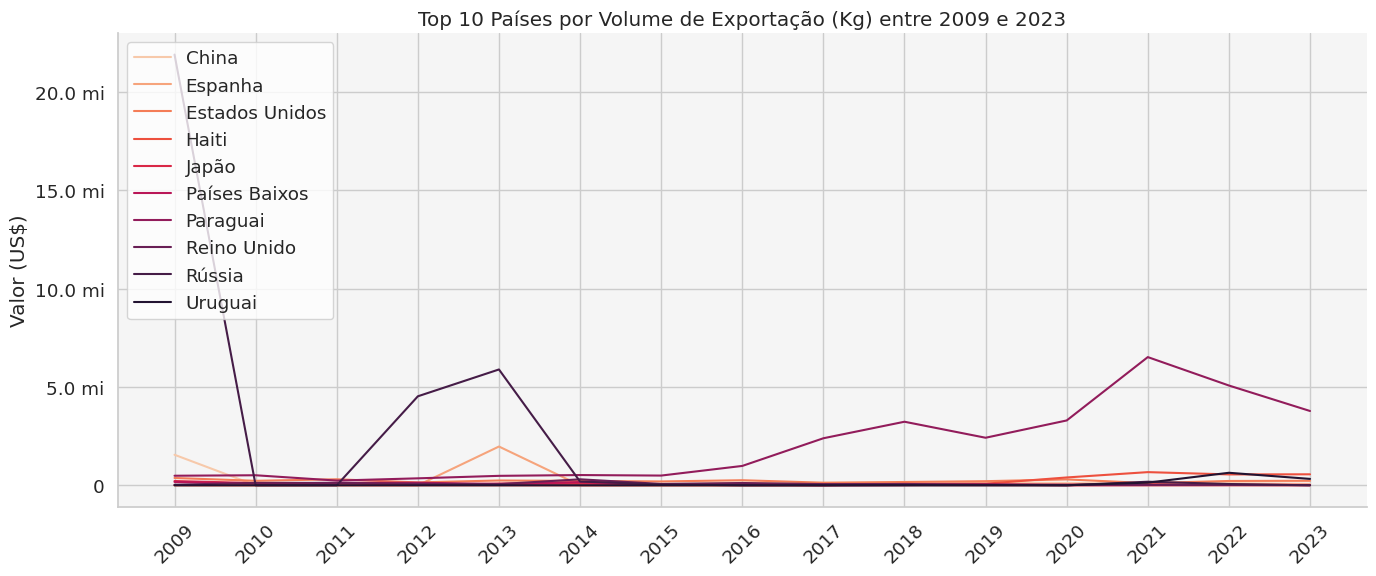

In [138]:
# Gráfico Top 10 países por volume de exportação de vinhos

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


plt.figure(figsize=(14, 6))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=top10_paises_exp_vol, x='Ano', y='Volume', hue='País', errorbar=None, palette = 'rocket_r')
plt.xticks(rotation=45)
plt.title('Top 10 Países por Volume de Exportação (Kg) entre 2009 e 2023')
plt.ylabel('Valor (US$)')
plt.xlabel('')
plt.legend(title = '', loc = 'upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

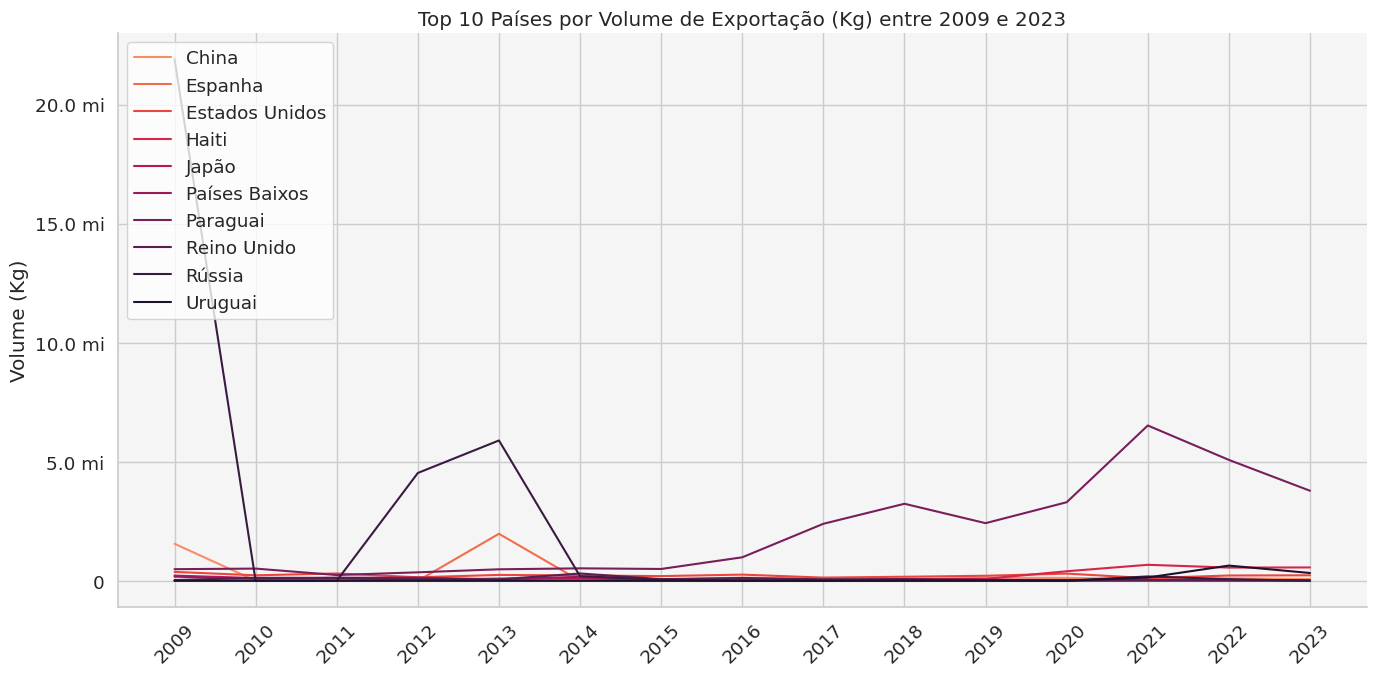

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Gerar paleta rocket_r com 12 cores e remover as 2 mais claras
cores_personalizadas = sns.color_palette('rocket_r', n_colors=12)[2:]

plt.figure(figsize=(14, 7))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Aplicar paleta personalizada no gráfico
sns.lineplot(
    data=top10_paises_exp_vol,
    x='Ano',
    y='Volume',
    hue='País',
    errorbar=None,
    palette=cores_personalizadas
)

plt.xticks(rotation=45)
plt.title('Top 10 Países por Volume de Exportação (Kg) entre 2009 e 2023')
plt.ylabel('Volume (Kg)')
plt.xlabel('')
plt.legend(title='', loc='upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [34]:
# Dos países com maior volume de exportação, qual paga maior valor por litro?






/tmp/ipython-input-1900509558.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


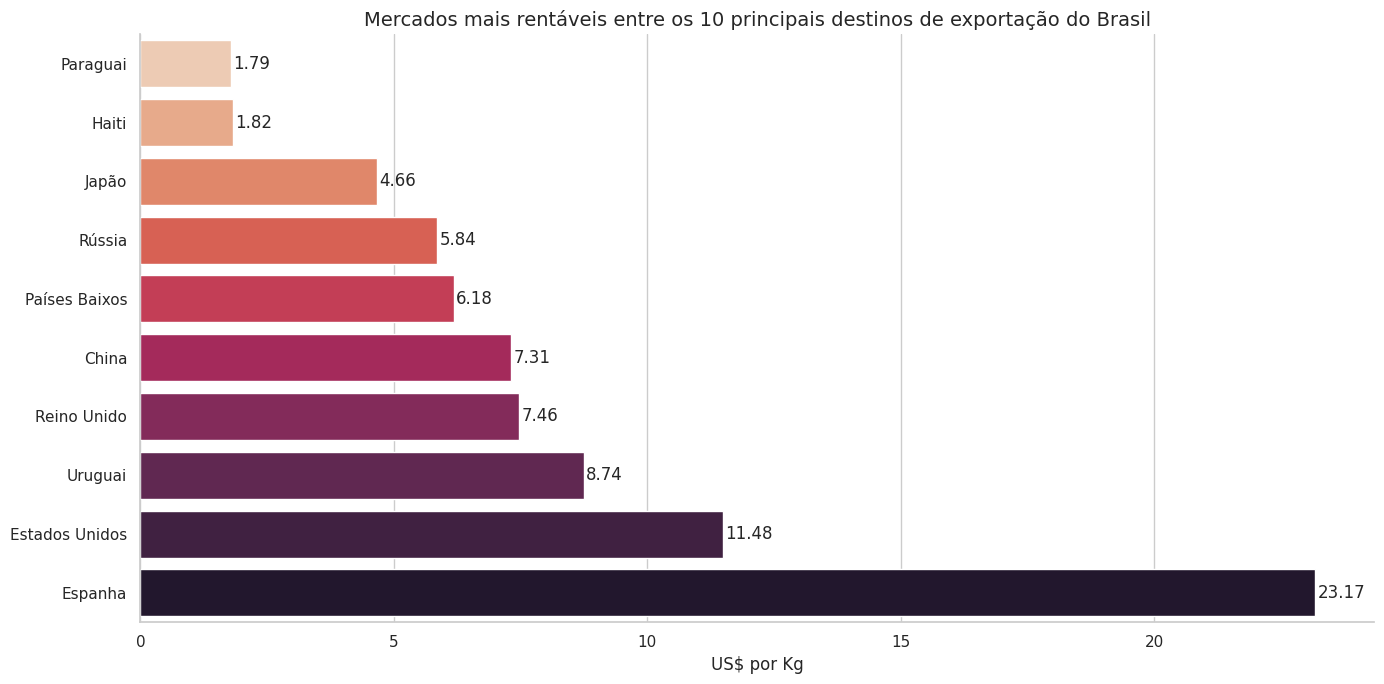

In [140]:
# Gerar um dataframe ordenado com os paises que mais pagam por volume, dentre os top 10 volume exportacao

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Agrupa por país e pega o maior Valor/Volume
top_valor_por_volume = top10_paises_exp_vol.groupby('País')['Valor/Volume'].max().reset_index()

# Ordena para barras maiores na base
top_valor_por_volume = top_valor_por_volume.sort_values(by='Valor/Volume')

# Estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))
cores = sns.color_palette("rocket_r", n_colors=len(top_valor_por_volume))

# Gráfico de barras horizontal
sns.barplot(
    x='Valor/Volume',
    y='País',
    data=top_valor_por_volume,
    palette=cores,
    orient='h'
)

# Títulos e rótulos
plt.title('Mercados mais rentáveis entre os 10 principais destinos de exportação do Brasil', fontsize=14)
plt.xlabel('US$ por Kg')
plt.ylabel('')

# Mostrar valores nas barras
for index, value in enumerate(top_valor_por_volume['Valor/Volume']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center')

sns.despine(top = True, right = True)

plt.tight_layout()
plt.show()

In [36]:
exportacao_long[exportacao_long['País']=='Brasil'].tail()

,Id,País,Ano,Volume,Valor,regiao_geografica,Valor/Volume
1237,23,Brasil,2019,0,0,América Latina,NaN
1238,23,Brasil,2020,0,0,América Latina,NaN
1239,23,Brasil,2021,31,46,América Latina,1.483871
1240,23,Brasil,2022,2504,952,América Latina,0.380192
1241,23,Brasil,2023,0,0,América Latina,NaN


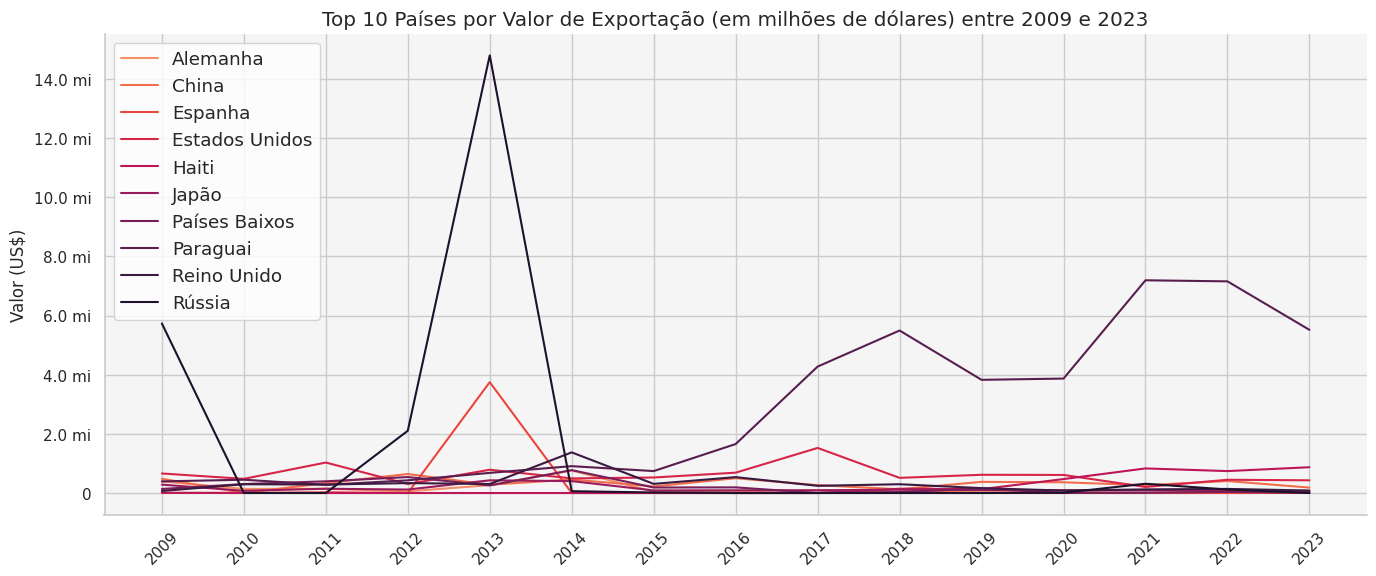

In [37]:
# Gráfico Top 10 países por Valor de exportação de vinhos

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Gerar paleta rocket_r com 12 cores e remover as 2 mais claras
cores_personalizadas = sns.color_palette('rocket_r', n_colors=12)[2:]

plt.figure(figsize=(14, 6))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=top10_paises_exp_valor, x='Ano', y='Valor', hue='País', errorbar=None, palette = cores_personalizadas)
plt.xticks(rotation=45)
plt.title('Top 10 Países por Valor de Exportação (em milhões de dólares) entre 2009 e 2023')
plt.ylabel('Valor (US$)')
plt.xlabel('')
plt.legend(title = '', loc = 'upper left')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

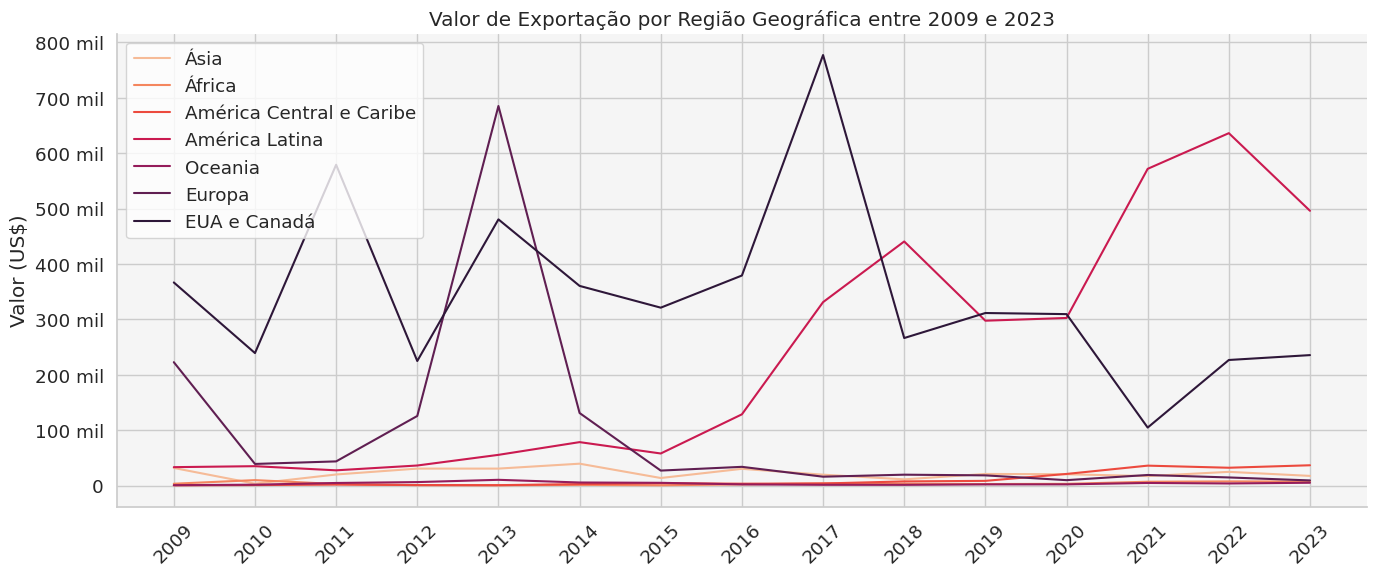

In [38]:
# Gráfico exportação por região geográfica
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=exportacao_long, x='Ano', y='Valor', hue='regiao_geografica', errorbar=None, palette= 'rocket_r')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Valor de Exportação por Região Geográfica entre 2009 e 2023')
plt.legend(title = 'Região')
plt.ylabel('Valor (US$)')
plt.xlabel('')
plt.legend(title = '')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [39]:
# Existe relação entre país que eu exporto menos em volume e o retorno em dólares é maior?
# Existe relação região geografica mais presente no dataset (maior proporcao) levando a maiores retorno em dolares?

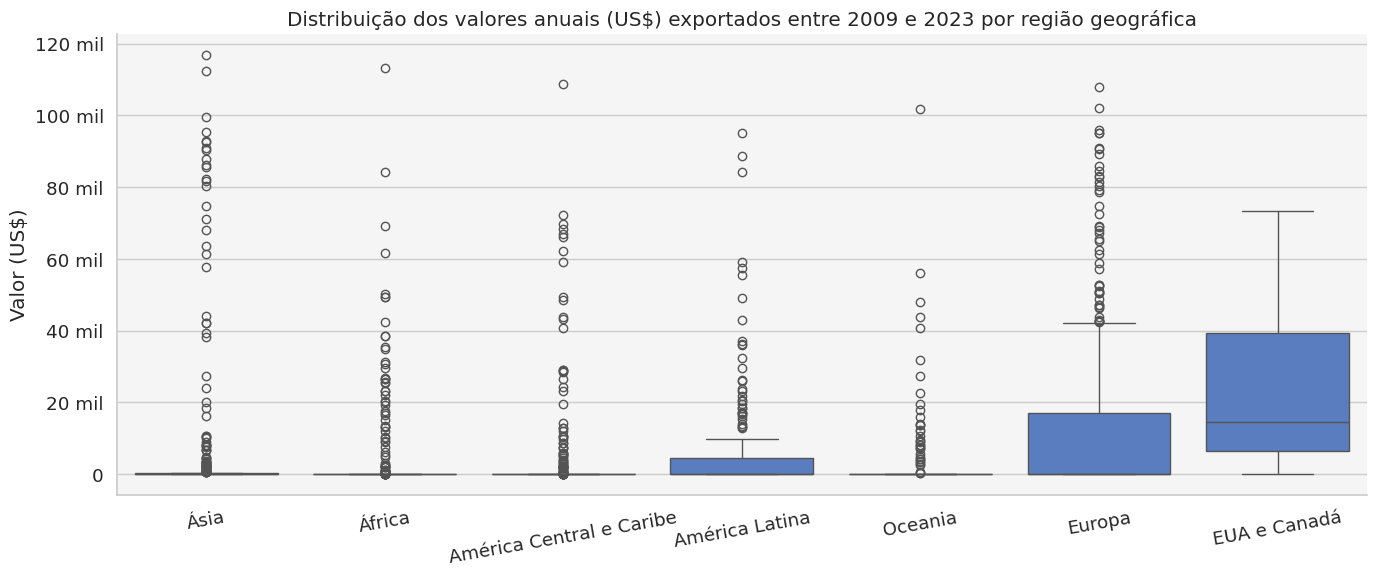

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo os limites dos quantis
q_low = exportacao_long['Valor'].quantile(0.05)
q_high = exportacao_long['Valor'].quantile(0.95)

# Filtrando o DataFrame
exportacao_long_quantile = exportacao_long[(exportacao_long['Valor'] >= q_low) & (exportacao_long['Valor'] <= q_high)]

# Criando o boxplot com dados filtrados
plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.boxplot(x='regiao_geografica', y='Valor', data=exportacao_long_quantile)
plt.title('Distribuição dos valores anuais (US$) exportados entre 2009 e 2023 por região geográfica')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=10)
plt.xlabel('')
plt.ylabel('Valor (US$)')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()




In [41]:


# Verificar top 10 países Valor/Volume
top10_paises_exp_valor_volume = (
    exportacao_long
    .groupby('País')['Valor/Volume']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)



top10_paises_exp_valor_volume = exportacao_long[exportacao_long['País'].isin(top10_paises_exp_valor_volume)]
top10_paises_exp_valor_volume['País'].unique()

array(['Áustria', 'Bangladesh', 'Bermudas', 'Bulgária', 'Camarões',
       'Croácia', 'Mauritânia', 'Panamá', 'Serra Leoa', 'Suíça'],
      dtype=object)

In [42]:
# Verificar valores inf

import numpy as np

print(exportacao_long[np.isinf(exportacao_long['Valor/Volume'])] )



      Id      País   Ano  Volume  Valor regiao_geografica  Valor/Volume
1400  26  Camarões  2020       0    178            África           inf


In [43]:
exportacao_long.head()

,Id,País,Ano,Volume,Valor,regiao_geografica,Valor/Volume
39,1,Afeganistão,2009,0,0,Ásia,NaN
40,1,Afeganistão,2010,0,0,Ásia,NaN
41,1,Afeganistão,2011,0,0,Ásia,NaN
42,1,Afeganistão,2012,0,0,Ásia,NaN
43,1,Afeganistão,2013,0,0,Ásia,NaN


In [44]:
exportacao_long[exportacao_long['País']=='Espanha']

,Id,País,Ano,Volume,Valor,regiao_geografica,Valor/Volume
2685,50,Espanha,2009,2181,4050,Europa,1.856946
2686,50,Espanha,2010,0,0,Europa,NaN
2687,50,Espanha,2011,5206,24618,Europa,4.728774
2688,50,Espanha,2012,0,0,Europa,NaN
2689,50,Espanha,2013,1972980,3748940,Europa,1.900141
2690,50,Espanha,2014,0,0,Europa,NaN
2691,50,Espanha,2015,0,0,Europa,NaN
2692,50,Espanha,2016,0,0,Europa,NaN
2693,50,Espanha,2017,0,0,Europa,NaN
2694,50,Espanha,2018,6123,22631,Europa,3.696064


In [45]:
# remover o registro com valor Inf
exportacao_long = exportacao_long[~ np.isinf(exportacao_long['Valor/Volume'])]


In [46]:

# Verificar top 10 regioes_Geograficas maior  Valor/Volume

# Agrupa por região geográfica e calcula a média da razão Valor/Volume
exportacao_top_valorxvolume = exportacao_long.groupby('regiao_geografica')['Valor/Volume'].mean()

# Ordena em ordem decrescente e pega as 10 maiores médias
exportacao_top_valorxvolume = exportacao_top_valorxvolume.sort_values(ascending=False).head(10)

# Reseta o índice para transformar 'regiao_geografica' em coluna
exportacao_top_valorxvolume = exportacao_top_valorxvolume.reset_index()

# Renomeia as colunas para algo mais legível
exportacao_top_valorxvolume.columns = ['Região', 'Valor_por_Volume']


# Ordena para barras maiores na base
exportacao_top_valorxvolume = exportacao_top_valorxvolume.sort_values(by='Valor_por_Volume', ascending=True)

print(exportacao_top_valorxvolume.head())

                     Região  Valor_por_Volume
6            América Latina          2.779593
5                    África          3.598160
4  América Central e Caribe          3.860139
3                      Ásia          3.959186
2              EUA e Canadá          4.140600


/tmp/ipython-input-1531954709.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


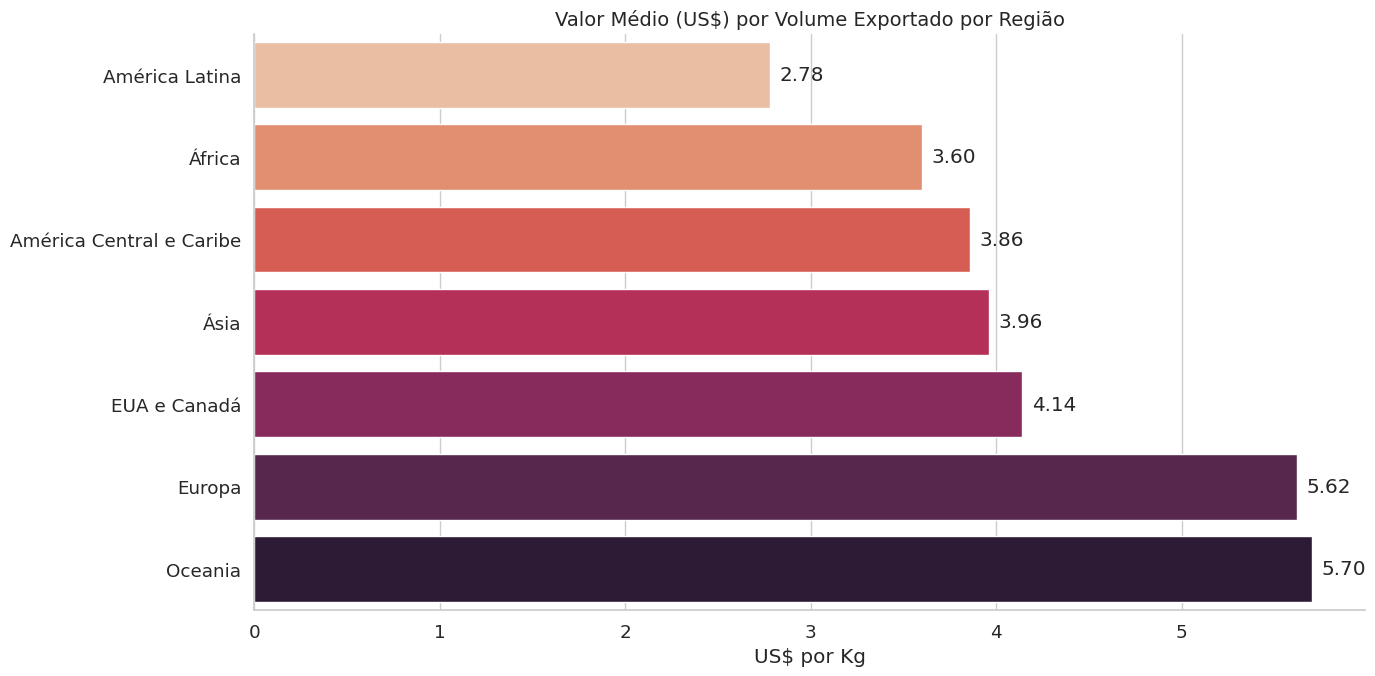

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt





# Estilo do gráfico

plt.figure(figsize=(14, 7))
ax = plt.gca()
#ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

# Gráfico de barras ordenado
sns.barplot(
    x='Valor_por_Volume',
    y='Região',
    data=exportacao_top_valorxvolume,
    palette='rocket_r',
    orient='h'
)



# Títulos e rótulos
plt.title('Valor Médio (US$) por Volume Exportado por Região', fontsize=14)
plt.xlabel('US$ por Kg')
plt.ylabel('')

# Mostrar valores nas barras
for index, value in enumerate(exportacao_top_valorxvolume['Valor_por_Volume']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center')

sns.despine(top = True, right = True)
plt.tight_layout()
plt.show()

In [48]:
# # 🔹 Boxplot: Valor por ano e região geográfica
# plt.figure(figsize=(14, 6))
# ax = plt.gca()
# ax.set_facecolor('#f5f5f5')
# sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
# sns.boxplot(x='Ano', y='Valor', hue='regiao_geografica', data=exportacao_long_quantile)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
# plt.title('Valor por Ano e Região Geográfica')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

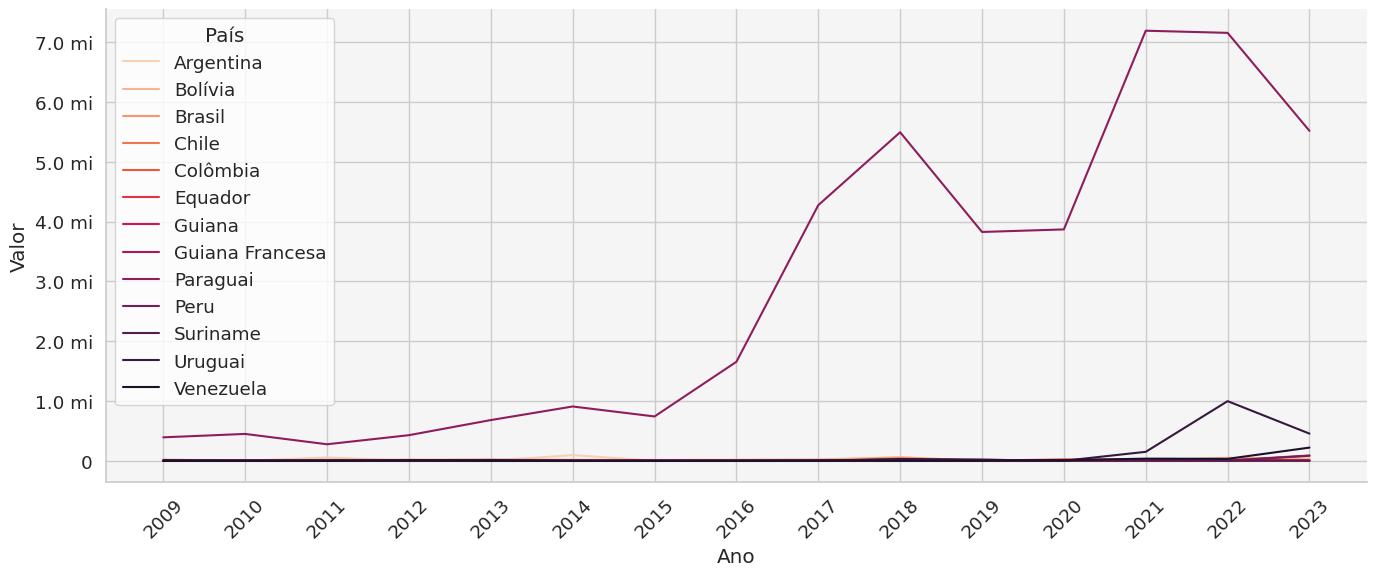

In [49]:
# Exportações para América Latina tem aumentado recentemente. Verificar quais países

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Somente paises América Latina
exp_america_latina = exportacao_long[exportacao_long['regiao_geografica'] == 'América Latina']

# Plotar gráfico
plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=exp_america_latina, x='Ano', y='Valor', hue='País', errorbar=None, palette = 'rocket_r')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('')
plt.legend(title = 'País')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

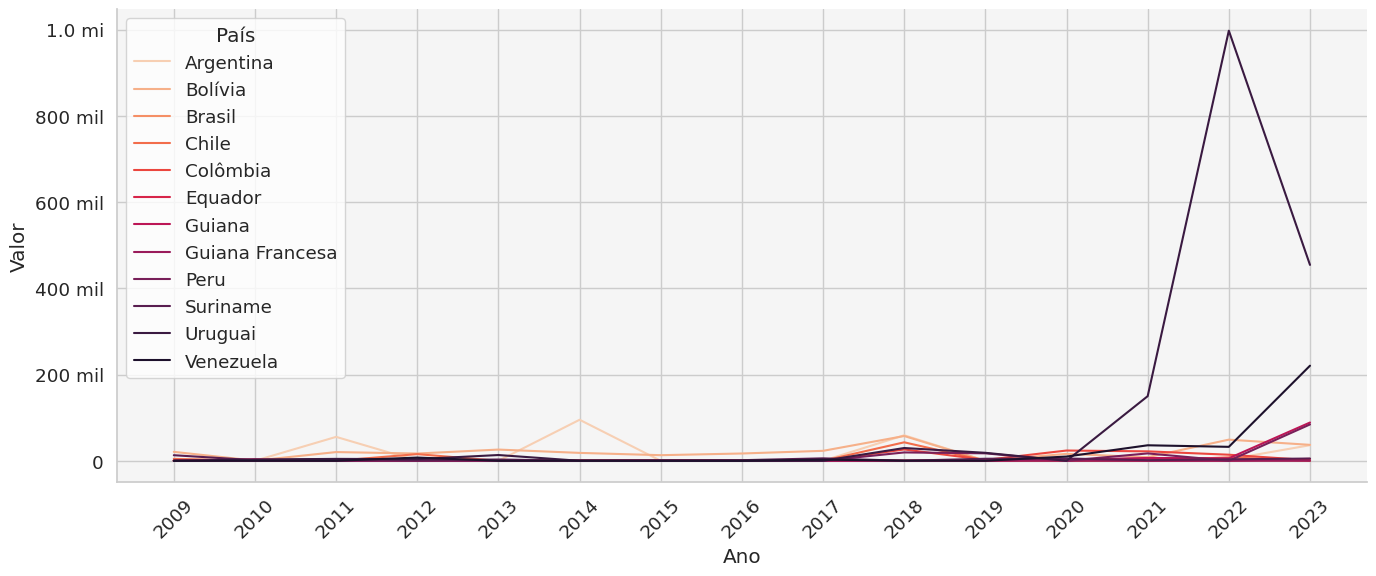

In [50]:
# Exportação América Latina exceto Paraguai

# remover Paraguai para visualizar demais países
exp_america_latina_exceto_paraguai = exp_america_latina[exp_america_latina['País'] != 'Paraguai']

# Plotar gráfico
plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=exp_america_latina_exceto_paraguai, x='Ano', y='Valor', hue='País', errorbar=None, palette = 'rocket_r')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('')
plt.legend(title = 'País')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [51]:
# Verificar potencial de exportação Europa

exp_europa = exportacao_long[exportacao_long['regiao_geografica'] == 'Europa']

top10_exp_europa = (
    exp_europa
    .groupby('País')['Valor']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_exp_europa = exp_europa[exp_europa['País'].isin(top10_exp_europa)]


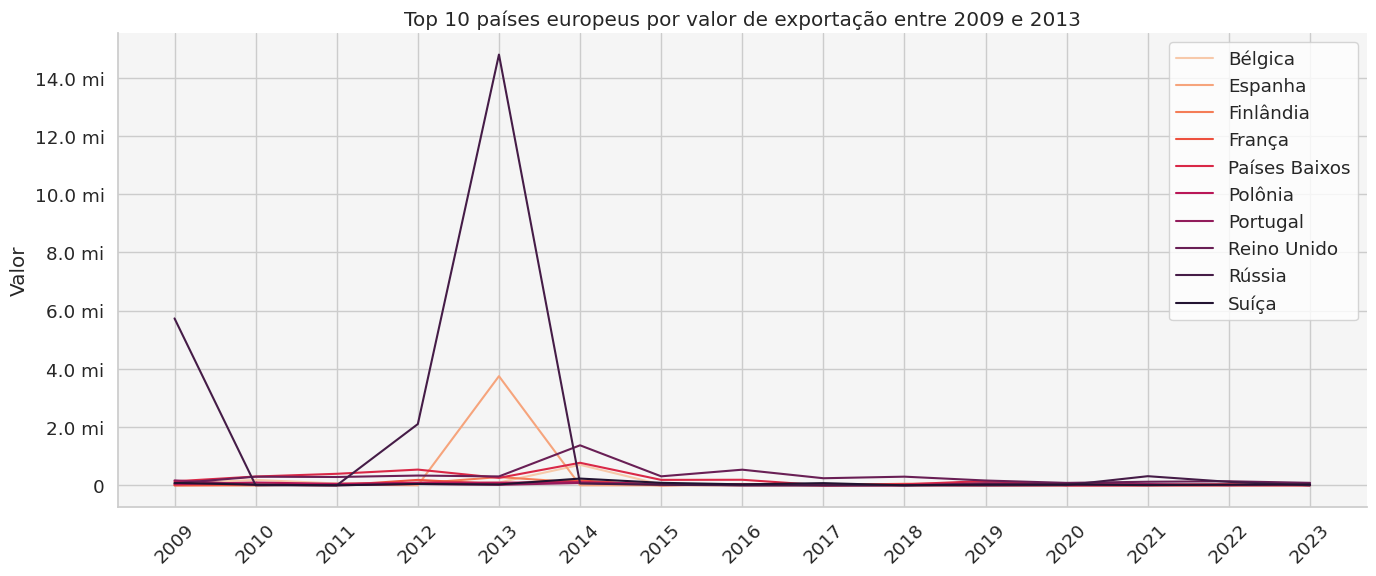

In [52]:
# Verificar potencial de exportação Europa

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# Plotar gráfico
plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)
sns.lineplot(data=top10_exp_europa, x='Ano', y='Valor', hue='País', errorbar=None, palette = 'rocket_r')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Top 10 países europeus por valor de exportação entre 2009 e 2013')
plt.legend(title = '')
plt.xlabel('')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

Importação

In [53]:
# Visualizar primeiras linhas do dataset 'importacao'
importacao.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42661,99201,32194,106317,157239,305701,303489,665101,407413,775421,358870,1164032,386425,1320244,315380,1151699,493093,1931449,966276,3600658,507509,2136394,722327,3041449,475331,1985184,722715,3033932,743335,2996543,578829,1686226,1138732,3241298,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,219173,202502,134354,149931,168134,171308,160926,201840,437831,668631,433478,691404,457033,704307,707194,853830,996948,1126928,850055,908380,586645,564129,1069717,1122438,2357113,3008737,1307519,1863924,2029271,2757417,2885143,4074739,3342223,5875679,3096425,4545305,2515557,3644055,5721360,7155615,11047710,16068528,11919346,19758144,8680860,10629243,4867017,5108215,3014081,4834030,2576557,4539354,1164724,1668539,909077,1169872,759712,829695,573198,629664,420075,550750,253685,382599,314749,634870,234006,647626,293935,1063825,56075,291876,192661,784674,198025,933545,113243,591167,114866,414070,115804,483316,95171,358275,158386,606333,83289,315959,142971,516975,101055,412794,136992,504168,106541,546967,92600,438595,102456,557947
2,3,Argélia,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,563,3249,0,0,0,0,2510,8761,0,0,8,161
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,167473,145823,90855,348653,277507,408399,395615,614134,709813,646978,888941,298471,479464,131738,209173,191972,264487,132634,188625,42438,64603,114570,164424,170413,242678,98854,136841,414931,590758,716062,1153585,455774,721398,852441,1493649,444896,815668,359542,795068,446315,730091,1397904,1992083,779008,1438076,1013306,2089559,1295190,3073775,2475780,5284871,2724941,6556544,2585537,6196286,3867336,6894469,5720024,9653634,10202602,17142493,10845213,21623751,11939727,25822840,15621172,36160548,14417761,37382581,13902750,38521731,16965266,52126581,16673491,58806736,14613839,55633562,12732815,49524694,13437321,53815956,12465041,48043201,14098009,45214862,15461740,51770842,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138


In [54]:
# Padronizar registros contidos na coluna País do df exportacao
importacao['País'] = (
    importacao['País']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.upper()
)

In [55]:

# Padronizar nomes das colunas

import re  # Importa o módulo de expressões regulares

# Seleciona colunas que representam apenas o ano (ex: '1970', '1985', '2023')
colunas_volume = [
    col for col in importacao.columns
    if re.match(r'^\d{4}$', str(col))  # Regex: começa e termina com exatamente 4 dígitos
]

# Seleciona colunas que representam o valor monetário (ex: '1970.1', '1985.1', '2023.1')
colunas_valor = [
    col for col in importacao.columns
    if re.match(r'^\d{4}\.1$', str(col))  # Regex: 4 dígitos seguidos de ponto e 1
]

# Transformar df para formato long (tidy)
importacao_volume_long = importacao.melt(
    id_vars=['Id', 'País'],
    value_vars=colunas_volume,
    var_name='Ano',
    value_name='Volume'
)



importacao_valor_long = importacao.melt(
    id_vars=['Id', 'País'],
    value_vars=colunas_valor,
    var_name='Ano',
    value_name='Valor'
)


# Ajustar o nome do ano (remover ".1")
importacao_valor_long['Ano'] = importacao_valor_long['Ano'].str.replace('.1', '', regex=False)

# Unir longs
importacao_long = pd.merge(
    importacao_volume_long,
    importacao_valor_long,
    on=['Id', 'País', 'Ano'],
    how='outer'
)



# Somente dados dos últimos 15 anos
importacao_long = importacao_long[importacao_long['Ano'] >= '2009']
print(importacao_long.head())

# Calcular top 10 países volume total
top10_paises_imp_vol = (
    importacao_long
    .groupby('País')['Volume']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)



top10_paises_imp_vol = importacao_long[importacao_long['País'].isin(top10_paises_imp_vol)]

# Calcular top 10 países valor total
top10_paises_imp_valor = (
    importacao_long
    .groupby('País')['Valor']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_paises_imp_valor = importacao_long[importacao_long['País'].isin(top10_paises_imp_valor)]



    Id           País   Ano  Volume      Valor
39   1  AFRICA DO SUL  2009  493093  1931449.0
40   1  AFRICA DO SUL  2010  966276  3600658.0
41   1  AFRICA DO SUL  2011  507509  2136394.0
42   1  AFRICA DO SUL  2012  722327  3041449.0
43   1  AFRICA DO SUL  2013  475331  1985184.0


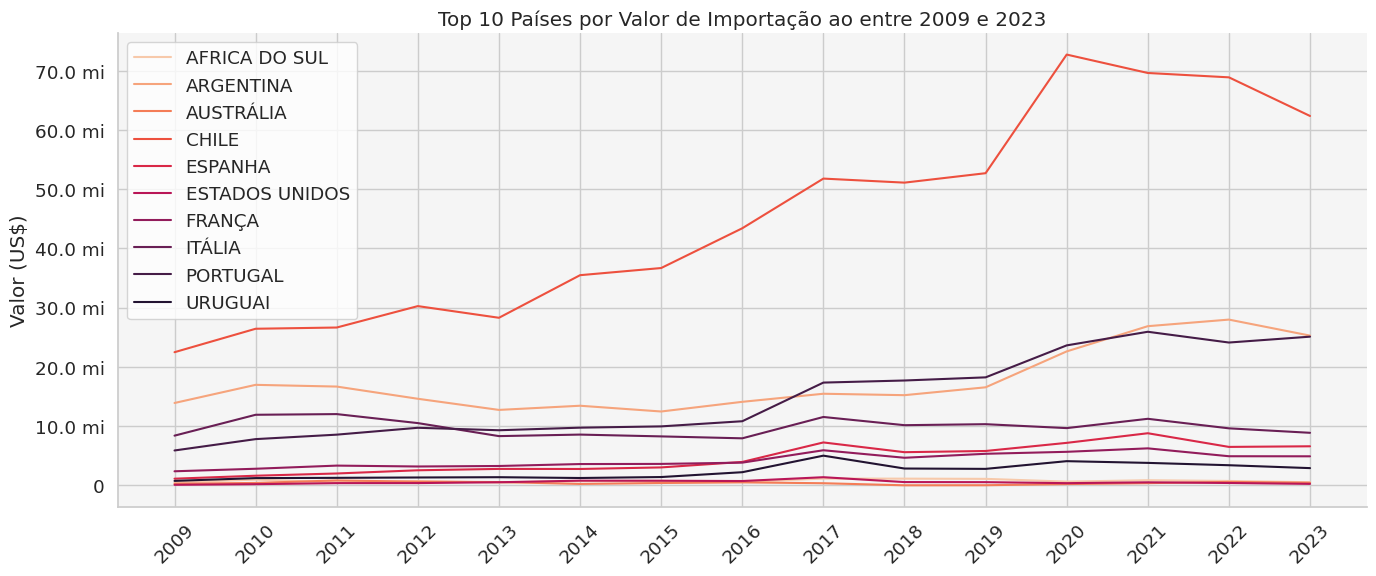

In [56]:
# Gráfico Top 10 Países por Valor de Importação

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.lineplot(data=top10_paises_imp_valor, x='Ano', y='Volume', hue='País', errorbar=None, palette= 'rocket_r')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
plt.xticks(rotation=45)
plt.title('Top 10 Países por Valor de Importação ao entre 2009 e 2023')
plt.ylabel('Valor (US$)')
plt.legend(title = '')
plt.xlabel('')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

**Processamento**
- Uvas tintas: usadas para vinhos tintos, sucos escuros, etc.
- Uvas brancas: usadas para vinhos brancos, espumantes, sucos claros.

In [57]:

# Visualizar primeiras linhas do dataset 'processamento'
processamento = pd.read_csv('Processamento.csv', sep = ';')
processamento.head()

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,TINTAS,TINTAS,10448228,11012833,10798824,8213674,17457849,22593885,20265190,24830345,21984546,25805939,17369967,27976307,31912172,22168465,22290855,30195343,18736158,17213860,25753888,24032041,24795507,18045593,22146466,21189308,24444665,19451024,19313252,19980696,13590968,18051102,23975805,17853113,19059959,22281079,35135485,41398115,34162995,43653087,48852574,39148123,23633831,44473588,39303313,36855419,29810706,29935627,13370866,32850915,26868514,nd,28003505,93296587,*,"35881118,23"
1,2,ti_Alicante Bouschet,Alicante Bouschet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3226,6807,6677,16210,8203,46923,46983,0,0,54266,6525,66194,65322,67471,64396,102174,160318,160966,216461,320853,626500,1076865,1078887,1775837,1588326,1652912,849263,2130579,2098824,1524728,1456305,1519576,908841,2040198,2103844,nd,2272985,811140,*,"4108858,21"
2,3,ti_Ancelota,Ancelota,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26088,47013,64318,218623,604797,861431,872741,1532209,1709883,1370728,853718,1346552,1274677,1137943,937844,773526,179028,733907,492106,nd,481402,6513974,*,"783688,39"
3,4,ti_Aramon,Aramon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nd,0,0,*,0
4,5,ti_Alfrocheiro,Alfrocheiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13986,19473,43396,20509,25310,31168,0,4320,0,0,0,0,0,0,0,nd,0,0,*,0


In [58]:
# Padronizar registros contidos na coluna País
processamento['cultivar'] = (
    processamento['cultivar']
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.upper()
)

# Verificar nulos e tipos das colunas
processamento.info()# No ano de 2023 há alguns valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 57 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        139 non-null    int64 
 1   control   139 non-null    object
 2   cultivar  139 non-null    object
 3   1970      139 non-null    int64 
 4   1971      139 non-null    int64 
 5   1972      139 non-null    int64 
 6   1973      139 non-null    int64 
 7   1974      139 non-null    int64 
 8   1975      139 non-null    int64 
 9   1976      139 non-null    int64 
 10  1977      139 non-null    int64 
 11  1978      139 non-null    int64 
 12  1979      139 non-null    int64 
 13  1980      139 non-null    int64 
 14  1981      139 non-null    int64 
 15  1982      139 non-null    int64 
 16  1983      139 non-null    int64 
 17  1984      139 non-null    int64 
 18  1985      139 non-null    int64 
 19  1986      139 non-null    int64 
 20  1987      139 non-null    int64 
 21  1988      139 no

In [59]:
processamento['2019'].unique()

array(['nd'], dtype=object)

In [60]:
processamento['2022'].unique()

array(['*'], dtype=object)

In [61]:
processamento['2023'].unique()

array(['35881118,23', '4108858,21', '783688,39', '0', '147979,4',
       '138338', '35292', '7800', '2152213,13', '5917172,94', '8310',
       '14359,8', '2200', '1439539,8', '1000', '126667', '830', nan,
       '3100', '15620', '584140,67', '390', '7179442,11', '988859,85',
       '700', '2600', '42503', '170188,25', '26788', '207896',
       '173886,53', '397456', '4182134,74', '5060', '1650', '330784',
       '5280', '163069', '92540', '13323', '5712206,92', '375165',
       '123714,49', '23500', '3006', '171866', '63676297,78', '150467',
       '8315602,19', '298406', '374902,95', '400', '239070', '4510',
       '10350', '67467', '80786,24', '46510', '6869070,67', '41078',
       '1100', '20657082,42', '351554,75', '3111774,33', '504982',
       '1211053,08', '404111', '900', '6000', '3915', '45898', '1310',
       '178683', '7856145,61', '4642665,9', '126736,45', '818121,85',
       '112905', '12687', '2342', '6150', '5954818,45', '139845', '2080',
       '28218', '800', '21794,25

In [62]:
# Seleciona linhas que possuem pelo menos um valor ausente (NaN).

processamento[processamento.isna().any(axis=1)]

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
32,33,ti_Jaen,JAEN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,576,2824,4290,215,1037,3642,0,0,0,0,0,0,0,0,0,nd,0,0,*,NaN
84,85,br_Clairette(1),CLAIRETTE(1),146617,116887,120166,94006,116154,139266,144596,87281,86242,86382,29871,52133,67028,5834,11168,13929,12182,910,0,0,754,0,0,0,5228,0,153092,0,0,0,0,0,0,0,0,0,0,0,0,0,0,949,0,0,0,0,0,0,0,nd,0,0,*,NaN


In [63]:
# Alterar o formato da tabela para long, adicionando Ano como coluna
processamento_long = processamento.melt(
    id_vars=['id', 'control', 'cultivar'],
    var_name='Ano',
    value_name='Processamento'
)

# Somente dados dos últimos 15 anos
processamento_long = processamento_long[processamento_long['Ano'] >= '2009']


processamento_long.rename(columns = {'cultivar': 'Cultivar'}, inplace = True)
processamento_long['Processamento']
print(processamento_long.head())
print(processamento_long.info())

      id               control           Cultivar   Ano Processamento
5421   1                TINTAS             TINTAS  2009      39148123
5422   2  ti_Alicante Bouschet  ALICANTE BOUSCHET  2009       1652912
5423   3           ti_Ancelota           ANCELOTA  2009       1370728
5424   4             ti_Aramon             ARAMON  2009             0
5425   5        ti_Alfrocheiro        ALFROCHEIRO  2009         31168
<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 5421 to 7505
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2085 non-null   int64 
 1   control        2085 non-null   object
 2   Cultivar       2085 non-null   object
 3   Ano            2085 non-null   object
 4   Processamento  2083 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.7+ KB
None


In [64]:
print(processamento_long.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2085 entries, 5421 to 7505
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2085 non-null   int64 
 1   control        2085 non-null   object
 2   Cultivar       2085 non-null   object
 3   Ano            2085 non-null   object
 4   Processamento  2083 non-null   object
dtypes: int64(1), object(4)
memory usage: 97.7+ KB
None


In [65]:
# Atribuir valor zero aos cultivares JAEN e Clairette em 2019,2022 e 2023

processamento_long.loc[
    (processamento_long['Cultivar'].isin(['JAEN', 'CLAIRETTE(1)'])) &
    (processamento_long['Ano'].isin(['2019', '2022', '2023'])), 'Processamento'
] = 0

processamento_long[
    (processamento_long['Cultivar'].isin(['JAEN', 'CLAIRETTE(1)'])) &
    (processamento_long['Ano'].isin(['2019', '2022', '2023']))
].head()

,id,control,Cultivar,Ano,Processamento
6843,33,ti_Jaen,JAEN,2019,0
6895,85,br_Clairette(1),CLAIRETTE(1),2019,0
7260,33,ti_Jaen,JAEN,2022,0
7312,85,br_Clairette(1),CLAIRETTE(1),2022,0
7399,33,ti_Jaen,JAEN,2023,0


In [66]:
# Conferindo se deu certo a atribuição do valor zero às colunas, resultando em nenhum registro com NaN
processamento_long[processamento_long.isna().any(axis=1)]# ok

,id,control,Cultivar,Ano,Processamento


In [67]:
# Conferir tipos da coluna Processamento
print(processamento_long['Processamento'].unique())
print(processamento_long['Processamento'].isna().sum())

[39148123 1652912 1370728 0 31168 39607 70932 2320 3365865 13229864 130269
 16240 680 1157679 38260 208276 3642 670 111537 393256 8876279 228360 650
 21190 74640 14148 56031 121525 978575 1387200 29180 4240 10430 648 532095
 303438 4199190 242484 105372 6710 131833 32556903 1675 35375 4812743
 32425 347230 717624 131760 3170 155338 7830 3289 2650 153905 281064
 331718 739588 14294841 61009 1446926 858910 510594 87359 48994 8030 52000
 2169397 2466530 90530 657286 2147 382995 16930 492 1578176 1940 14498
 49935 23633831 849263 853718 35790 26044 2125997 6617553 85264 16230 100
 845205 9310 44153 84074 5670 68480 318059 6179006 200025 17959 11986
 109942 29457 644072 1309849 1650 9466 379720 258484 2266985 63526 68593
 97629 372 22104122 1088 33750 3836555 47099 73720 479201 35860 105186
 4358 4430 2230 251587 49176 2142 83565 649194 8595609 55811 1151570
 690210 317404 41426 2396 4045 28945 16940 36036 1345161 2120405 96828
 350866 3629 165518 1338957 560 6520 76145 44473588 2130579 134

In [68]:
# Transformar tipos das colunas
# Primeiro, converter as colunas para os tipos corretos
processamento_long['Ano'] = processamento_long['Ano'].astype(int)

# Para a coluna "Processamento"
# Passo 1: converter tudo para string
processamento_long['Processamento'] = processamento_long['Processamento'].astype(str)

# Passo 2: substituir vírgulas por pontos
processamento_long['Processamento'] = processamento_long['Processamento'].str.replace(',', '.', regex=False)



In [69]:
# Ano de 2019 com dados faltantes. Remover?

In [70]:
# Passo 3: converter para float, ignorando erros
processamento_long['Processamento'] = pd.to_numeric(processamento_long['Processamento'], errors='coerce')
# processamento_long['Processamento'] = pd.to_numeric(processamento_long['Processamento'])

In [71]:
# O dataframe processamento tem 139 linhas e 137 valores faltantes para a coluna 'Processamento' para o ano 2019

print(processamento.shape[0])
processamento_long[processamento_long['Ano'] == 2019].isna().sum()

139


,0
id,0
control,0
Cultivar,0
Ano,0
Processamento,137


In [72]:
processamento_long[
    (processamento_long['Ano'] == '2019') &
    (processamento_long['Processamento'].notna())
]

,id,control,Cultivar,Ano,Processamento


In [73]:
processamento[['control', '2018',
               '2019', '2020']]

,control,2018,2019,2020
0,TINTAS,26868514,nd,28003505
1,ti_Alicante Bouschet,2103844,nd,2272985
2,ti_Ancelota,492106,nd,481402
3,ti_Aramon,0,nd,0
4,ti_Alfrocheiro,0,nd,0
...,...,...,...,...
134,br_Vermentino,0,nd,0
135,br_Vernaccia,4020,nd,95680
136,br_Viogner,0,nd,0
137,br_Viognier,470555,nd,531026


In [74]:
processamento['control'].unique()

array(['TINTAS', 'ti_Alicante Bouschet', 'ti_Ancelota', 'ti_Aramon',
       'ti_Alfrocheiro', 'ti_Arinarnoa', 'ti_Aspirant Bouschet',
       'ti_Barbera', 'ti_Bonarda', 'ti_Cabernet Franc',
       'ti_Cabernet Sauvignon', 'ti_ Caladoc', 'ti_Campanario',
       'ti_Canaiolo', 'ti_Carignan', 'ti_Carmenere', 'ti_Castelão',
       'ti_Corvina', 'ti_Croatina', 'ti_Cinsaut', 'ti_Dom Felder',
       'ti_Dolcetto', 'ti_Durif', 'ti_Egiodola', 'ti_Ekigaina',
       'ti_Festival (Sugraone)', 'ti_Franconia', 'ti_Freisa',
       'ti_Gamay St Romain', 'ti_Gamay Beaujolais', 'ti_Grand Noir',
       'ti_Grenache', 'ti_Jaen', 'ti_Lagrein', 'ti_Lambrusco',
       'ti_Malbec', 'ti_Marzemina', 'ti_Merlot', 'ti_Marselan',
       'ti_Mistura de uvas viníferas tinto ', 'ti_Molinera',
       'ti_Montepulciano', 'ti_Moscato Bailey', 'ti_Napa Gamay',
       'ti_Nebbiolo', 'ti_Petit Verdot', 'ti_Petite Sirah', 'ti_Pinotage',
       'ti_Pinot Noir', 'ti_Pinot Saint George', 'ti_Piriquita',
       'ti_Primitivo', 

In [75]:

# Criar dicionario para dividir uvas por categoria
uvas_por_categoria = {
    'tintas': [
        'ti_Alicante Bouschet', 'ti_Ancelota', 'ti_Aramon', 'ti_Alfrocheiro', 'ti_Arinarnoa',
        'ti_Aspirant Bouschet', 'ti_Barbera', 'ti_Bonarda', 'ti_Cabernet Franc',
        'ti_Cabernet Sauvignon', 'ti_ Caladoc', 'ti_Campanario', 'ti_Canaiolo', 'ti_Carignan',
        'ti_Carmenere', 'ti_Castelão', 'ti_Corvina', 'ti_Croatina', 'ti_Cinsaut', 'ti_Dom Felder',
        'ti_Dolcetto', 'ti_Durif', 'ti_Egiodola', 'ti_Ekigaina', 'ti_Festival (Sugraone)',
        'ti_Franconia', 'ti_Freisa', 'ti_Gamay St Romain', 'ti_Gamay Beaujolais', 'ti_Grand Noir',
        'ti_Grenache', 'ti_Jaen', 'ti_Lagrein', 'ti_Lambrusco', 'ti_Malbec', 'ti_Marzemina',
        'ti_Merlot', 'ti_Marselan', 'ti_Mistura de uvas viníferas tinto ', 'ti_Molinera',
        'ti_Montepulciano', 'ti_Moscato Bailey', 'ti_Napa Gamay', 'ti_Nebbiolo', 'ti_Petit Verdot',
        'ti_Petite Sirah', 'ti_Pinotage', 'ti_Pinot Noir', 'ti_Pinot Saint George', 'ti_Piriquita',
        'ti_Primitivo', 'ti_Rebo', 'ti_Refosco', 'ti_Rondinella', 'ti_Ruby Cabernet',
        'ti_Sangiovese', 'ti_Saperavi ', 'ti_Sira (falsa)', 'ti_Tannat', 'ti_Tempranillo',
        'ti_Teroldego', 'ti_Torrontes', 'ti_Tinta Barroca', 'ti_Tinta Roriz ', 'ti_Touriga Francesa',
        'ti_Touriga Nacional', 'ti_Tinta Madeira', 'ti_Tintoria', 'ti_Trincdeira', 'ti_Trousseau',
        'ti_Zinfandel', 'ti_Outras1'
    ],
    'brancas_e_rosadas': [
        'br_Aliatico', 'br_Aligote', 'br_Altesse', 'br_Alvarinho', 'br_Arriloba', 'br_Auxerrois',
        'br_Burger', 'br_Chardonnay', 'br_Chasselas', 'br_Chenin Blanc', 'br_Clairette(1)',
        'br_Colombard', 'br_Flora', 'br_Garganega', 'br_Gewurztraminer', 'br_Gouveio',
        'br_Gros Manseng', 'br_Italia (Pirovano 65) (PE)', 'br_Maccabeo', 'br_Malvasia',
        'br_Malvasia Amarela', 'br_Malvasia Bianca', 'br_Malvasia Chianti', 'br_Malvasia Verde',
        'br_Malvasia di Candia', 'br_Malvasia Istriana', 'br_Mistura de uvas viníferas',
        'br_Moscato_branco', 'br_Moscato Canelli', 'br_Moscato Giallo', 'br_Moscato Nazareno',
        'br_Moscato Bianco R2', 'br_Moscato de Alexandria', 'br_Moscato Rosado',
        'br_Muscat a Petits Grains', 'br_Muller Thurgau', 'br_Muscadelle', 'br_Ora', 'br_Palomino',
        'br_Petit Manseng', 'br_Peverella', 'br_Pinot Blanc', 'br_Pinot Gris', 'br_Prosecco',
        'br_Red Veltliner', 'br_Riesling Italico', 'br_Riesling Renano', 'br_Sauvignon Blanc(2)',
        'br_Sauvignon Gris', 'br_Seara Nova', 'br_Semillon', 'br_Schonburger', 'br_Sylvaner',
        'br_Tocai Friulano', 'br_Trebbiano', 'br_Trebbiano Toscano', 'br_Verdea', 'br_Verdelho',
        'br_Verdiso', 'br_Vermentino', 'br_Vernaccia', 'br_Viogner ', 'br_Viognier', 'br_Outras(3)'
    ],

    'tintas_total': ['TINTAS'
    ],
    'brancas_e_rosadas_total': ['BRANCASEROSADAS'
    ]

}

processamento_long['Categoria'] = processamento_long['control'].map(
    lambda x: next((categoria for categoria, lista in uvas_por_categoria.items() if x in lista), 'Outras')
)
processamento_long.head()




,id,control,Cultivar,Ano,Processamento,Categoria
5421,1,TINTAS,TINTAS,2009,39148123.0,tintas_total
5422,2,ti_Alicante Bouschet,ALICANTE BOUSCHET,2009,1652912.0,tintas
5423,3,ti_Ancelota,ANCELOTA,2009,1370728.0,tintas
5424,4,ti_Aramon,ARAMON,2009,0.0,tintas
5425,5,ti_Alfrocheiro,ALFROCHEIRO,2009,31168.0,tintas


In [76]:
processamento_long[processamento_long['Ano'] == 2023].head()

,id,control,Cultivar,Ano,Processamento,Categoria
7367,1,TINTAS,TINTAS,2023,35881118.23,tintas_total
7368,2,ti_Alicante Bouschet,ALICANTE BOUSCHET,2023,4108858.21,tintas
7369,3,ti_Ancelota,ANCELOTA,2023,783688.39,tintas
7370,4,ti_Aramon,ARAMON,2023,0.00,tintas
7371,5,ti_Alfrocheiro,ALFROCHEIRO,2023,0.00,tintas


In [77]:
# Valor do processamento da cultivar 'TINTAS'
processamento_total_tintas = processamento_long[processamento_long['Categoria'] == 'tintas_total']
processamento_total_tintas.head()


,id,control,Cultivar,Ano,Processamento,Categoria
5421,1,TINTAS,TINTAS,2009,39148123.0,tintas_total
5560,1,TINTAS,TINTAS,2010,23633831.0,tintas_total
5699,1,TINTAS,TINTAS,2011,44473588.0,tintas_total
5838,1,TINTAS,TINTAS,2012,39303313.0,tintas_total
5977,1,TINTAS,TINTAS,2013,36855419.0,tintas_total


In [78]:

# Soma dos processamentos da categoria 'tintas'
processamento_categoria_tintas = processamento_long[processamento_long['Categoria'] == 'tintas']
soma_categoria_tintas = processamento_categoria_tintas.groupby('Ano')['Processamento'].sum()
soma_categoria_tintas = soma_categoria_tintas.reset_index()

soma_categoria_tintas.columns = ['Ano', 'Processamento']

print(soma_categoria_tintas.head())



    Ano  Processamento
0  2009     39148123.0
1  2010     23633831.0
2  2011     44473588.0
3  2012     39303313.0
4  2013     36855419.0


In [79]:
# Garantir que ambos os DataFrames tenham as colunas 'Ano' e 'Processamento'
df_soma = soma_categoria_tintas[['Ano', 'Processamento']].copy()
df_total = processamento_total_tintas[['Ano', 'Processamento']].copy()

# Renomear para evitar conflito
df_total = df_total.rename(columns={'Processamento': 'Processamento_total'})
df_soma = df_soma.rename(columns={'Processamento': 'Processamento_soma'})

# Juntar os dois DataFrames pelo ano
comparacao = df_soma.merge(df_total, on='Ano')

# Comparar os valores
comparacao['iguais'] = comparacao['Processamento_soma'] == comparacao['Processamento_total']

# Exibir resultado
print(comparacao)

     Ano  Processamento_soma  Processamento_total  iguais
0   2009         39148123.00          39148123.00    True
1   2010         23633831.00          23633831.00    True
2   2011         44473588.00          44473588.00    True
3   2012         39303313.00          39303313.00    True
4   2013         36855419.00          36855419.00    True
5   2014         29810706.00          29810706.00    True
6   2015         29935627.00          29935627.00    True
7   2016         13370866.00          13370866.00    True
8   2017         32850915.00          32850915.00    True
9   2018         26868514.00          26868514.00    True
10  2019                0.00                  NaN   False
11  2020         28003505.00          28003505.00    True
12  2021         93296587.00          93296587.00    True
13  2022                0.00                  NaN   False
14  2023         35881118.23          35881118.23   False


In [80]:
# Remover ano de 2019 e 2022?

#processamento_long = processamento_long[~ processamento_long['Ano'].isin(2019,2022)]

In [81]:
# Criar um dataframe sem as colunas TINTAS e BRANCASEROSADAS:
processamento_exceto_tipos = processamento_long[~ processamento_long['control'].isin(['TINTAS', 'BRANCASEROSADAS'])]

# Criar dataframe com top 10 cultivares
top10_cultivares = (
    processamento_exceto_tipos
    .groupby('Cultivar')['Processamento']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .index
)

top10_cultivares = processamento_long[processamento_long['Cultivar'].isin(top10_cultivares)]
top10_cultivares.head(10)

,id,control,Cultivar,Ano,Processamento,Categoria
5430,10,ti_Cabernet Franc,CABERNET FRANC,2009,3365865.0,tintas
5431,11,ti_Cabernet Sauvignon,CABERNET SAUVIGNON,2009,13229864.0,tintas
5458,38,ti_Merlot,MERLOT,2009,8876279.0,tintas
5469,49,ti_Pinot Noir,PINOT NOIR,2009,1387200.0,tintas
5480,60,ti_Tannat,TANNAT,2009,4199190.0,tintas
5502,82,br_Chardonnay,CHARDONNAY,2009,4812743.0,brancas_e_rosadas
5523,103,br_Moscato_branco,MOSCATO BRANCO,2009,14294841.0,brancas_e_rosadas
5539,119,br_Prosecco,PROSECCO,2009,2169397.0,brancas_e_rosadas
5541,121,br_Riesling Italico,RIESLING ITALICO,2009,2466530.0,brancas_e_rosadas
5550,130,br_Trebbiano,TREBBIANO,2009,1578176.0,brancas_e_rosadas


In [82]:
top10_cultivares[top10_cultivares['Ano'].isin([2019])]


,id,control,Cultivar,Ano,Processamento,Categoria
6820,10,ti_Cabernet Franc,CABERNET FRANC,2019,NaN,tintas
6821,11,ti_Cabernet Sauvignon,CABERNET SAUVIGNON,2019,NaN,tintas
6848,38,ti_Merlot,MERLOT,2019,NaN,tintas
6859,49,ti_Pinot Noir,PINOT NOIR,2019,NaN,tintas
6870,60,ti_Tannat,TANNAT,2019,NaN,tintas
6892,82,br_Chardonnay,CHARDONNAY,2019,NaN,brancas_e_rosadas
6913,103,br_Moscato_branco,MOSCATO BRANCO,2019,NaN,brancas_e_rosadas
6929,119,br_Prosecco,PROSECCO,2019,NaN,brancas_e_rosadas
6931,121,br_Riesling Italico,RIESLING ITALICO,2019,NaN,brancas_e_rosadas
6940,130,br_Trebbiano,TREBBIANO,2019,NaN,brancas_e_rosadas


In [83]:
# Atribuir zero ao Processamento do ano de 2019


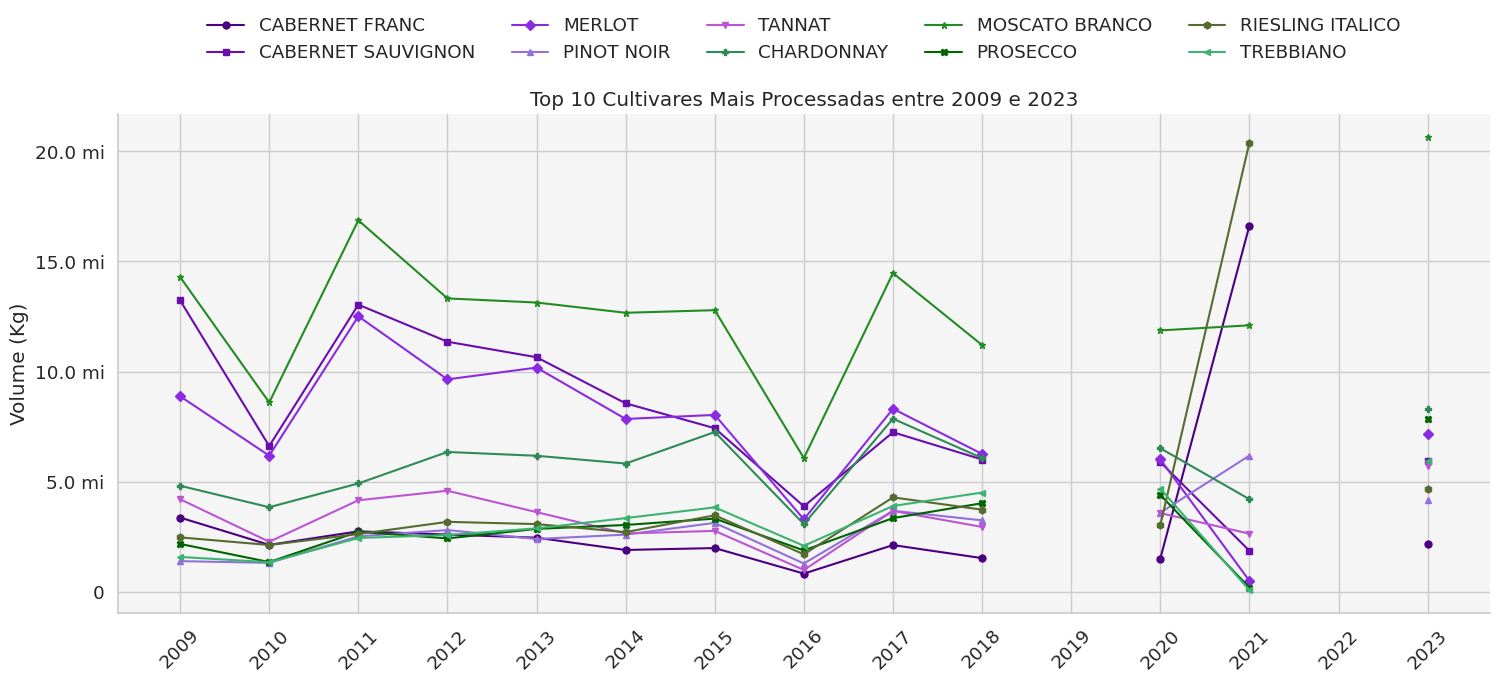

In [84]:
plt.figure(figsize=(16, 8))

# Cores pré-definidas
cores_tintas = ['#4B0082', '#6A0DAD', '#8A2BE2', '#9370DB', '#BA55D3', '#DDA0DD']
# cores_brancas = ['#2E8B57', '#3CB371', '#32CD32', '#00FA9A', '#98FB98', '#90EE90']
cores_brancas = [
    '#2E8B57',  # Sea Green
    '#228B22',  # Forest Green
    '#006400',  # Dark Green
    '#556B2F',  # Dark Olive Green
    '#3CB371',  # Medium Sea Green
    '#006A4E'   # Bottle Green
]


# Marcadores variados
marcadores = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'h', '<', '>']

contador_tintas = 0
contador_brancas = 0
contador_marcador = 0

for cultivar in top10_cultivares['Cultivar'].unique():
    dados_cultivar = top10_cultivares[top10_cultivares['Cultivar'] == cultivar]
    categoria = dados_cultivar['Categoria'].iloc[0]

    if categoria == 'tintas':
        cor = cores_tintas[contador_tintas % len(cores_tintas)]
        contador_tintas += 1
    else:
        cor = cores_brancas[contador_brancas % len(cores_brancas)]
        contador_brancas += 1

    marcador = marcadores[contador_marcador % len(marcadores)]
    contador_marcador += 1

    plt.plot(dados_cultivar['Ano'], dados_cultivar['Processamento'],
             label=cultivar, color=cor, linewidth=1.5,
             marker=marcador, markersize=5)

# Estética do gráfico
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
plt.xticks(sorted(top10_cultivares['Ano'].unique()), rotation=45)
plt.ylabel('Volume (Kg)')
plt.xlabel('')
plt.title('Top 10 Cultivares Mais Processadas entre 2009 e 2023')
plt.legend(
    title='',
    loc='center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    frameon=False
)
sns.despine(top=True, right=True)
plt.tight_layout(pad=3.0)
plt.show()

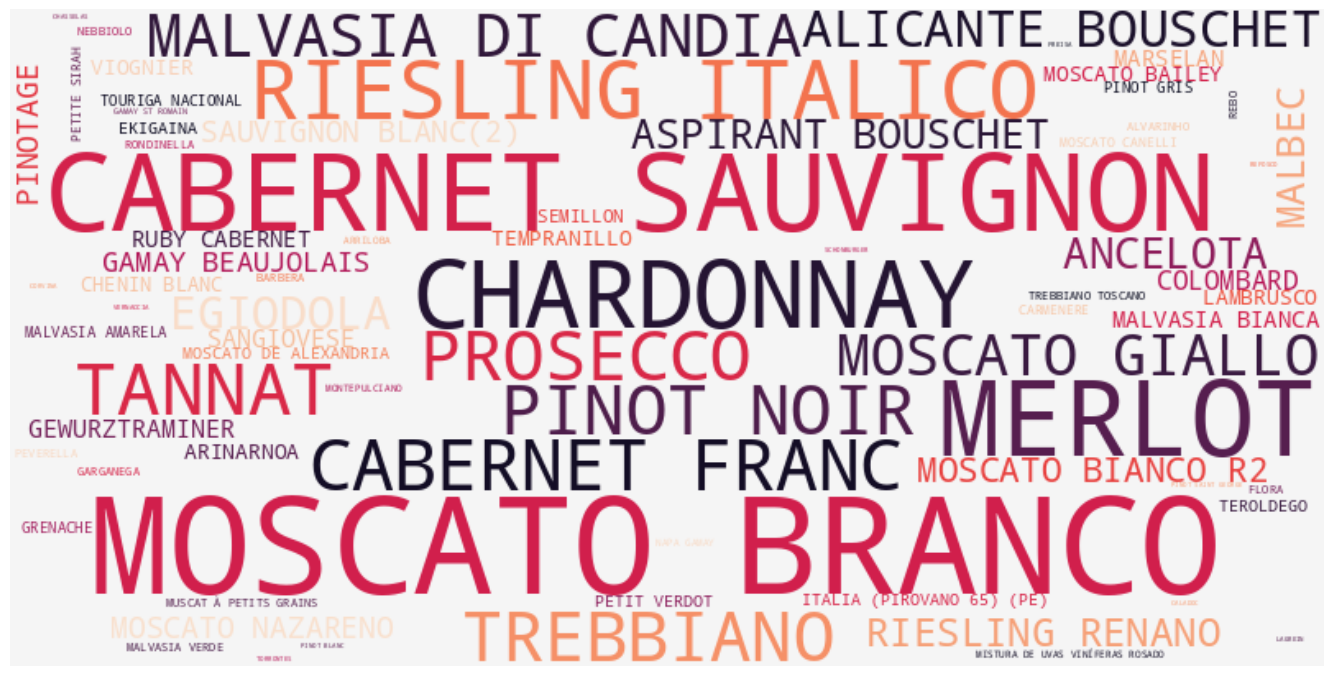

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 🔹 Remover cultivares agregadas
processamento_nuvem_palav = processamento_long[
    ~processamento_long['Cultivar'].isin(['TINTAS', 'BRANCAS E ROSADAS'])
]

# 🔹 Criar dicionário de frequências
frequencias = (
    processamento_nuvem_palav
    .groupby('Cultivar')['Processamento']
    .sum()
    .to_dict()
)


# 🔹 Gerar nuvem de palavras com colormap estilizado
nuvem = WordCloud(
    width=800,
    height=400,
    background_color='#f5f5f5',
    colormap='rocket_r'  #

).generate_from_frequencies(frequencias)

# 🔹 Exibir
plt.figure(figsize=(14, 7))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
#plt.title('Cultivares Processadas (Nuvem de Palavras)', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

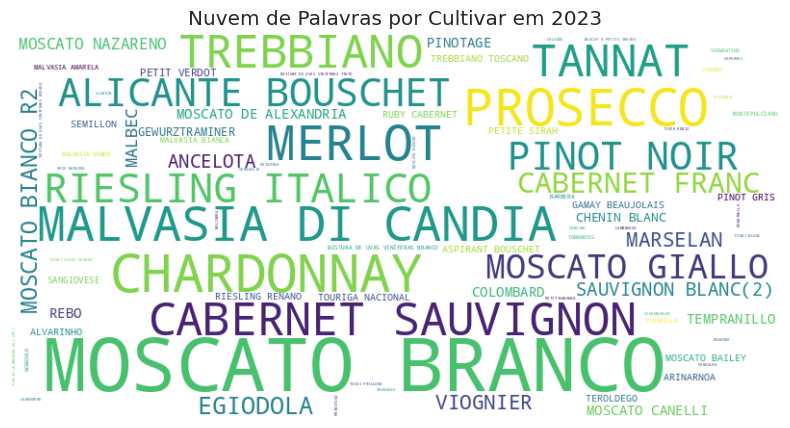

In [86]:
# Fazer nuvem de palavras com as cultivares processadas

#!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filtrar para ano de 2023

processamento_nuvem_palav_2023 = processamento_nuvem_palav[processamento_nuvem_palav['Ano'] == 2023]


# Criar dicionário: {cultivar: soma dos processamentos}
frequencias = (
    processamento_nuvem_palav_2023
    .groupby('Cultivar')['Processamento']
    .sum()
    .to_dict()
)

# Gerar a nuvem de palavras
nuvem = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencias)

# Exibir
plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras por Cultivar em 2023')
plt.show()


In [87]:
# Relação entre condições climáticas e variação no processamento dos Top 10 Cultivares

# Dataframe

Criar dataframe único para visualizar volume de exportações, importações, processamento e comercialização

In [88]:
processamento_long['Cultivar'].head()

,Cultivar
5421,TINTAS
5422,ALICANTE BOUSCHET
5423,ANCELOTA
5424,ARAMON
5425,ALFROCHEIRO


In [89]:
print(comercializacao_long.head())
print(processamento_long.head())
print(importacao_long.head())
print(exportacao_long.head())

      id              control             Produto   Ano  Comercializacao  \
2418   1        VINHO DE MESA       VINHO DE MESA  2009        234525979   
2419   2             vm_Tinto               TINTO  2009        193004182   
2420   3            vm_Rosado              ROSADO  2009          2307580   
2421   4            vm_Branco              BRANCO  2009         39214217   
2422   5  VINHO  FINO DE MESA  VINHO FINO DE MESA  2009         33080270   

          Categoria  
2418  Vinho de Mesa  
2419  Vinho de Mesa  
2420  Vinho de Mesa  
2421  Vinho de Mesa  
2422         Outros  
      id               control           Cultivar   Ano  Processamento  \
5421   1                TINTAS             TINTAS  2009     39148123.0   
5422   2  ti_Alicante Bouschet  ALICANTE BOUSCHET  2009      1652912.0   
5423   3           ti_Ancelota           ANCELOTA  2009      1370728.0   
5424   4             ti_Aramon             ARAMON  2009            0.0   
5425   5        ti_Alfrocheiro        ALF

In [90]:
# Somar volumes comercializados, exportados, importados e processados por ano para mostrar no gráfico

comercializacao_soma_ano = comercializacao_long.groupby('Ano')['Comercializacao'].sum()
comercializacao_soma_ano = comercializacao_soma_ano.reset_index()
comercializacao_soma_ano.columns = ['Ano', 'Comercializacao']
comercializacao_soma_ano['Ano'] = comercializacao_soma_ano['Ano'].astype(int)

exportacao_soma_ano = exportacao_long.groupby('Ano')['Volume'].sum()
exportacao_soma_ano = exportacao_soma_ano.reset_index()
exportacao_soma_ano.columns = ['Ano', 'Exportacao']
exportacao_soma_ano['Ano'] = exportacao_soma_ano['Ano'].astype(int)

importacao_soma_ano = importacao_long.groupby('Ano')['Volume'].sum()
importacao_soma_ano = importacao_soma_ano.reset_index()
importacao_soma_ano.columns = ['Ano', 'Importacao']
importacao_soma_ano['Ano'] = importacao_soma_ano['Ano'].astype(int)

processamento_soma_ano = processamento_long.groupby('Ano')['Processamento'].sum()
processamento_soma_ano = processamento_soma_ano.reset_index()
processamento_soma_ano.columns = ['Ano', 'Processamento']

# Verificando se todos os anos tem em todos os dataframes, pois depois vou juntar com .merge
print(comercializacao_soma_ano['Ano'].unique())
print(importacao_soma_ano['Ano'].unique())
print(exportacao_soma_ano['Ano'].unique())
print(processamento_soma_ano['Ano'].unique())

[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023]
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023]
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023]
[2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022
 2023]


In [91]:
print(processamento_soma_ano.info())
print(comercializacao_soma_ano.info())
print(importacao_soma_ano.info())
print(exportacao_soma_ano.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ano            15 non-null     int64  
 1   Processamento  15 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 372.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Ano              15 non-null     int64
 1   Comercializacao  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Ano         15 non-null     int64
 1   Importacao  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes
None
<class 'pandas.core.frame.Data

In [92]:
# Criar um DataFrame com os resultados
viticultura = comercializacao_soma_ano.merge(exportacao_soma_ano, on = 'Ano', how = 'left')
viticultura = viticultura.merge(importacao_soma_ano, on = 'Ano', how = 'left')
viticultura = viticultura.merge(processamento_soma_ano, on = 'Ano', how = 'left')

viticultura.head()

,Ano,Comercializacao,Exportacao,Importacao,Processamento
0,2009,679550353,25514198,55926957,143410052.0
1,2010,643306862,1280574,70737868,91475906.0
2,2011,672553986,1214834,72705225,164809206.0
3,2012,643569389,5775376,74209440,151646074.0
4,2013,720817130,9149059,67954436,147627520.0


In [93]:
# Transformar data frame formato long para plotar o grafico

viticultura_long = viticultura.melt(
    id_vars=['Ano'],
    value_vars=['Comercializacao', 'Exportacao', 'Importacao', 'Processamento'],
    var_name='Operacao',
    value_name='Volume'
)

viticultura_long.head()

,Ano,Operacao,Volume
0,2009,Comercializacao,679550353.0
1,2010,Comercializacao,643306862.0
2,2011,Comercializacao,672553986.0
3,2012,Comercializacao,643569389.0
4,2013,Comercializacao,720817130.0


In [94]:
viticultura_long.tail()

,Ano,Operacao,Volume
55,2019,Processamento,0.000000e+00
56,2020,Processamento,1.380154e+08
57,2021,Processamento,3.291257e+08
58,2022,Processamento,0.000000e+00
59,2023,Processamento,1.991148e+08


In [95]:
viticultura_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ano       60 non-null     int64  
 1   Operacao  60 non-null     object 
 2   Volume    60 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.5+ KB


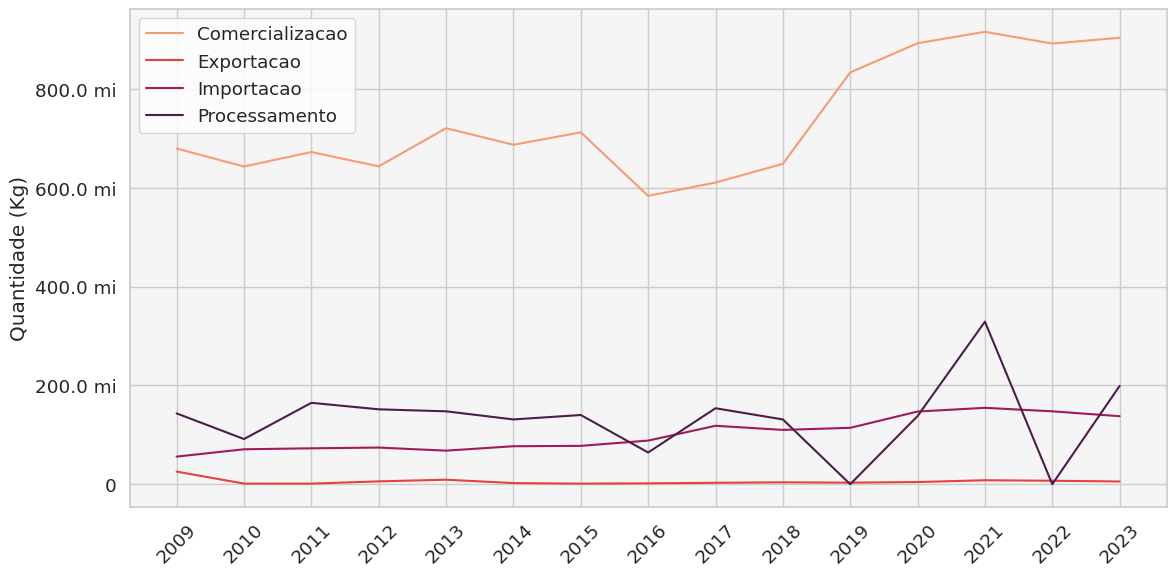

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12, 6))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_valores))
ax = plt.gca()
ax.set_facecolor('#f5f5f5')
sns.lineplot(data = viticultura_long, x= 'Ano', y = 'Volume', hue = 'Operacao', errorbar = None,
             palette='rocket_r')
plt.xticks(sorted(viticultura_long['Ano'].unique()), rotation=45)
plt.legend(title = '')
plt.ylabel('Quantidade (Kg)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

